In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import spline


In [3]:
from scipy import stats, integrate
from decimal import Decimal

In [4]:
import matplotlib as mpl
import seaborn as sns


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [5]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 400

In [6]:
merged = pd.read_excel("Jan_16_2016/Corrected_Merged_Jan_9_2016.xlsx")
#comp = pd.read_excel("Update_Review/Sep/Files_to_Use/Cross_Ref/PosRec.xls", header=None)
#comp= comp.rename(columns={0:"Order"})

In [8]:
RNONE_RC1 = pd.read_excel("RC/RNONE_First_RC.xls")
RNONE_RC2 = pd.read_excel("RC/RNONE_Second_RC.xls")
RNONE_RC1 = RNONE_RC1[~(RNONE_RC1.RNONE_Results != "NONE")]

RBHOM_RC = pd.read_excel("RC/RBHOM_RC.xls")
RBHOM_RC = RBHOM_RC[RBHOM_RC.Date > "2014"]
RBHOM_RC = RBHOM_RC.drop_duplicates("Order")

RDFRG_RC=pd.read_excel("RC/RDFRG_RC.xls")
RDFRG_RC = RDFRG_RC.drop_duplicates("Order")
RDFRG_RC.ix[RDFRG_RC.RDFRG_Results == "F MOD TROPH(S)", "RDFRG_Results"] = "MOD TROPH(S)"

RNANA_RC = pd.read_excel("RC/RNANA_RC.xls")
RNANA_RC = RNANA_RC.drop_duplicates('Order')
RNANA_RC = RNANA_RC[RNANA_RC.Date > "2014"]

RCOLI_RC = pd.read_excel("RC/RCOLI_RC.xls")
RCOLI_RC = RCOLI_RC.drop_duplicates('Order')

RCHIL_RC = pd.read_excel("RC/RCHIL_RC.xlsx")
RCHIL_RC = RCHIL_RC.drop_duplicates("Order")

RGIAR_RC = pd.read_excel("RC/RGIAR_RC.xls")
RGIAR_RC = RGIAR_RC.drop_duplicates("Order")

RHART_RC = pd.read_excel("RC/RHART_RC.xls")
RHART_RC = RHART_RC.drop_duplicates("Order")

RHIS2_RC = pd.read_excel("RC/RHIS2_RC.xls")
RHIS2_RC = RHIS2_RC.drop_duplicates("Order")

RIODA_RC = pd.read_excel("RC/RIODA_RC.xls")
RIODA_RC = RIODA_RC.drop_duplicates("Order")

C2EIC_RC1 = pd.read_excel("RC/C2EIC_First_RC.xls")
C2EIC_RC2 = pd.read_excel("RC/C2EIC_Second_RC.xls")
C2EIC_RC2 = C2EIC_RC2[~(C2EIC_RC2.Order == "Order#")]
C2EIC_RC1 = C2EIC_RC1.drop_duplicates("Order")
C2EIC_RC2 = C2EIC_RC2.drop_duplicates("Order").describe()
C2EIC_RC1 = C2EIC_RC1.rename(columns={"C2EIC_Resultst":"C2EIC_Results"})
C2EIC_RC = pd.concat([C2EIC_RC1, C2EIC_RC2]).drop_duplicates("Order")
C2EIC = C2EIC_RC
C2EIC = C2EIC[C2EIC.C2EIC_Results != "pending"]
C2EIC = C2EIC[C2EIC.C2EIC_Results != "pending*"]
C2EIC.ix[C2EIC.C2EIC_Results == "POSITIVE", "C2EIC_Results"] = "Positive"
C2EIC = C2EIC[(C2EIC["Ward Name"] != "Doctor, Test") & (C2EIC["Ward Name"] != "Test Doctor")]
C2EIC_RC = C2EIC
C2EIC_RC.ix[C2EIC_RC.C2EIC_Results == "Negative Negati", "C2EIC_Results"] = "Negative"
C2EIC.ix[C2EIC.C2EIC_Results == "NEGATIVE", "C2EIC_Results"] = "Negative"
C2EIC_RC = C2EIC_RC[C2EIC_RC.C2EIC_Results == "Positive"]

C2EIG_RC1 = pd.read_excel("RC/C2EIG_First_Book.xls")
C2EIG_RC2 = pd.read_excel("RC/C2EIG_Second_Book.xls")
C2EIG_RC=pd.concat([C2EIG_RC1, C2EIG_RC2]).drop(["MRN", "Last Name", "First Name", "Coll. Date"], axis=1)
C2EIG_RC = C2EIG_RC.drop(["Unit"], axis=1)
C2EIG_RC= C2EIG_RC.rename(columns={"Order#": "Order", "Test": "C2EIG", "Results": "C2EIG_Results", "Ord. Date":"Date"})
C2EIG_RC = C2EIG_RC[~(C2EIG_RC.Order =="Order#")]
C2EIG_RC["Date"]= pd.to_datetime(C2EIG_RC["Date"])
C2EIG_RC = C2EIG_RC[["Order", "Date", "Ward Name", "C2EIG", "C2EIG_Results"]]
C2EIG = C2EIG_RC
C2EIG = C2EIG[C2EIG.C2EIG_Results != "pending"]
C2EIG = C2EIG[C2EIG.C2EIG_Results != "pending*"]
C2EIG.ix[C2EIG.C2EIG_Results == "POSITIVE", "C2EIG_Results"] = "Positive"
C2EIG = C2EIG[(C2EIG["Ward Name"] != "Doctor, Test") & (C2EIG["Ward Name"] != "Test Doctor")]
C2EIG_RC = C2EIG
C2EIG_RC.ix[C2EIG_RC.C2EIG_Results == "Negative Negati", "C2EIG_Results"] = "Negative"
C2EIG.ix[C2EIG.C2EIG_Results == "NEGATIVE", "C2EIG_Results"] = "Negative"
C2EIG_RC = C2EIG_RC[C2EIG_RC.C2EIG_Results == "Positive"]
C2EIG_RC = C2EIG_RC.drop_duplicates("Order")

C2EIH_RC1 = pd.read_excel("RC/C2EIH_First_RC.xls")
C2EIH_RC2 = pd.read_excel("RC/C2EIH_Second_RC.xls")
C2EIH_RC1 = C2EIH_RC1[~(C2EIH_RC1.Order == "Order#")]
C2EIH_RC = pd.concat([C2EIH_RC1, C2EIH_RC2]).drop_duplicates("Order")
C2EIH_RC = C2EIH_RC[C2EIH_RC.C2EIH_Results == "Positive"]

v2EIAC_RC = pd.read_excel("RC/v2EIAC_RC.xls")
v2EIAC_RC = v2EIAC_RC.drop_duplicates("Order")
v2EIAC_RC = v2EIAC_RC[v2EIAC_RC["2EIAC_Results"] == "Positive"]

v2EIAG_RC = pd.read_excel("RC/v2EIAG_RC.xls")
v2EIAG_RC = v2EIAG_RC[(v2EIAG_RC["Unnamed: 6"].isnull())]
v2EIAG_RC = v2EIAG_RC.drop_duplicates("Order").drop(["Unnamed: 5", "Unnamed: 6"], axis=1)
v2EIAG_RC = v2EIAG_RC[v2EIAG_RC["2EIAG_Results"] == "Positive"]
v2EIAG_RC["Date"] = pd.to_datetime(v2EIAG_RC["Date"])

v2EIAH_RC = pd.read_excel("RC/v2EIAH_RC.xls")
v2EIAH_RC = v2EIAH_RC[["Order", "Date", "Ward Name", "2EIAH", "2EIAH_Results"]]
v2EIAH_RC = v2EIAH_RC[v2EIAH_RC["2EIAH_Results"] == "Positive"]

RTRIC_RC = pd.read_excel("RC/RTRIC_RC.xls")
RTRIC_RC = RTRIC_RC.drop_duplicates("Order")

EIAC = pd.concat([C2EIC_RC.rename(columns={'C2EIC':'EIAC', 'C2EIC_Results':'EIAC_Results'}),v2EIAC_RC.rename(columns={'2EIAC':'EIAC', '2EIAC_Results':'EIAC_Results'})])

EIAG = pd.concat([C2EIG_RC.rename(columns={'C2EIG':'EIAG', 'C2EIG_Results':'EIAG_Results'}), v2EIAG_RC.rename(columns={'2EIAG':'EIAG', '2EIAG_Results':'EIAG_Results'})])

EIAH = pd.concat([C2EIH_RC.rename(columns={'C2EIH':'EIAH', 'C2EIH_Results':'EIAH_Results'}), v2EIAH_RC.rename(columns={'2EIAH':'EIAH', '2EIAH_Results':'EIAH_Results'})])

EIAH.Date = pd.to_datetime(EIAH.Date)

In [ ]:
drop from merged
I3201020
H7240000
H8160735
I6230889
I6230958

In [ ]:
drop from RC
H9100151
I4030215
G9030652
I3120009
H4030982
G9040264
I3130053
I3130419
G9090674
G9100509
I4151175
G9100566
I3130063
H9100150
H4040757
I3070122

In [652]:
RC[~(RC.Order.isin(t))]

In [697]:
x[x.Order == "H4040757"]

,Order,Date,Ward Name_x,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results,Ward Name_y
117177,H4040757,2014-06-04,The Khalsa Medical Clinic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RGIAR,MANY CYST(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EIAG,Positive,NaN,NaN,NaN
129116,H4040757,2014-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RGIAR,MANY CYST(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Khalsa Medical Clinic


In [741]:
i = 0

In [734]:
def abc(i):
    while 1:
        yield(x[x.Order == l[i]])
        


In [747]:
i +=1

In [748]:
next(abc(i))


,Order,Date,Ward Name_x,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results,Ward Name_y
110797,I4151175,2015-04-15,Lab1 AS,NaN,NaN,RBHOM,FEW,RDFRG,MOD TROPH(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128773,I4151175,2015-04-15,NaN,NaN,NaN,RBHOM,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lab1 AS


In [749]:
l[i]

'I4151175'

In [760]:
RC.describe()

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAG,EIAG_Results,EIAH,EIAH_Results,EIAC,EIAC_Results
count,127452,127452,127452,113698,113698,10076,10076,2862,2862,1536,1536,956,956,378,378,190,190,219,219,146,146,122,122,62,62,267,267,199,199,56,56
unique,127452,617,6414,1,1,1,4,1,4,1,16,1,12,1,13,1,12,1,12,1,12,1,13,1,4,2,1,2,1,2,1
top,I8060895,2014-02-05 00:00:00,Referring Atlanta,RNONE,NONE,RBHOM,MOD,RDFRG,FEW TROPH(S),RNANA,FEW T/C,RCOLI,FEW T/C,RHART,FEW T/C,RCHIL,FEW T/C,RGIAR,RARE CYST(S),RHIS2,FEW T/C W/O RBC,RIODA,MOD T/C,RTRIC,MANY TROPH(S),C2EIG,Positive,C2EIH,Positive,C2EIC,Positive
freq,1,517,24753,113698,113698,10076,3216,2862,973,1536,307,956,229,378,90,190,36,219,55,146,37,122,30,62,21,155,267,138,199,35,56
first,NaN,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [775]:
LC[LC.Order=="J2161103"]

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAG,EIAG_Results,EIAH,EIAH_Results,EIAC,EIAC_Results
117083,J2161103,2015-12-16,Midwest Wellness Center,NaN,NaN,RBHOM,MANY,NaN,NaN,NaN,NaN,RCOLI,FEW TROPH(S),RHART,FEW CYST(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127456,J2161103,2015-12-16,Midwest Wellness Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCHIL,MANY T/C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
new = merged.set_index("Order").combine_first(RC.set_index("Order"))

In [774]:
LC.Order.value_counts()
#= RC.merge(RCHIL_RC2, how="outer", on=["Order", "Date", "Ward Name", "RCHIL", "RCHIL_Results"])

J2161103    2
J1190548    2
J1180030    2
J2170056    2
H0030570    1
G9250158    1
I5060835    1
I3160110    1
I2040158    1
I8080336    1
H6200663    1
I1300510    1
H0010569    1
I1220111    1
H7190443    1
H2210087    1
H5260242    1
I8060895    1
H0151422    1
G9020285    1
H1170174    1
H3170312    1
G9080214    1
H4240880    1
H8060096    1
H6281202    1
J0090931    1
H5110771    1
I5221098    1
H0210257    1
H2160979    1
H3010656    1
H1131143    1
H4240264    1
I1260086    1
I9020246    1
I8070348    1
I9250942    1
I5180279    1
J0260156    1
I5200518    1
J1200647    1
I4300401    1
I5280510    1
I5060792    1
G9110506    1
H4240790    1
H9100180    1
J0160575    1
H4100816    1
H5220159    1
I5010372    1
H5240912    1
H8310257    1
I9250719    1
I7291029    1
I1230551    1
J2030290    1
J2030256    1
H6050517    1
H3020825    1
I3050247    1
H3290684    1
I4100956    1
H2111032    1
H7240779    1
H1170175    1
I1080122    1
H2170227    1
H8230879    1
H5120075    1
J00808

In [34]:
RC = RC.combine_first(RCHIL_RC2).reset_index()

In [35]:
RCHIL_RC2 = RCHIL_RC2.reset_index()

In [22]:
x.Order.value_counts().value_counts()

1    128969
2        86
Name: Order, dtype: int64

In [20]:
x = merged.merge(RC, how="outer", on=['Order', 'Date', 'RNONE', 'RNONE_Results', 'RBHOM',
       'RBHOM_Results', 'RDFRG', 'RDFRG_Results', 'RNANA', 'RNANA_Results',
       'RCOLI', 'RCOLI_Results', 'RHART', 'RHART_Results', 'RCHIL',
       'RCHIL_Results', 'RGIAR', 'RGIAR_Results', 'RHIS2', 'RHIS2_Results',
       'RIODA', 'RIODA_Results', 'RTRIC', 'RTRIC_Results', 'EIAG',
       'EIAG_Results', 'EIAH', 'EIAH_Results', 'EIAC', 'EIAC_Results'])

In [36]:
RC.describe()

,Order,Date,EIAC,EIAC_Results,EIAG,EIAG_Results,EIAH,EIAH_Results,RBHOM,RBHOM_Results,RCHIL,RCHIL_Results,RCOLI,RCOLI_Results,RDFRG,RDFRG_Results,RGIAR,RGIAR_Results,RHART,RHART_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RNANA,RNANA_Results,RNONE,RNONE_Results,RTRIC,RTRIC_Results,Ward Name
count,127457,127457,56,56,267,267,199,199,10076,10076,199,199,956,956,2862,2862,219,219,378,378,146,146,122,122,1536,1536,113698,113698,62,62,127457
unique,127457,617,2,1,2,1,2,1,1,4,1,12,1,12,1,4,1,12,1,13,1,12,1,13,1,16,1,1,1,4,6414
top,H0250509,2014-02-05 00:00:00,C2EIC,Positive,C2EIG,Positive,C2EIH,Positive,RBHOM,MOD,RCHIL,FEW T/C,RCOLI,FEW T/C,RDFRG,FEW TROPH(S),RGIAR,RARE CYST(S),RHART,FEW T/C,RHIS2,FEW T/C W/O RBC,RIODA,MOD T/C,RNANA,FEW T/C,RNONE,NONE,RTRIC,MANY TROPH(S),Referring Atlanta
freq,1,517,35,56,155,267,138,199,10076,3216,199,39,956,229,2862,973,219,55,378,90,146,37,122,30,1536,307,113698,113698,62,21,24753
first,NaN,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
RC.describe().T['count'][5::2].sum()

17069

In [44]:
RCHIL_RC2[((RCHIL_RC2.Order.isin(RC.Order)))].Order

0     J2300132
1     J2240357
2     J2170632
3     J2170880
4     J2170056
5     J2160632
6     J2161103
7     J2150225
8     J2100839
9     J2080247
10    J2040652
11    J2040799
12    J2040013
13    J2030390
14    J1300174
15    J1230339
16    J1210249
17    J1190548
18    J1180030
19    J1130819
20    J1070035
21    J1050727
22    J1050747
23    J1041022
24    J1031013
25    J1031097
26    J0310300
Name: Order, dtype: object

In [47]:
RC[(RC.RDFRG=="RDFRG") & (RC.Order.isin(RCHIL_RC2[((RCHIL_RC2.Order.isin(RC.Order)))].Order))]

,Order,Date,EIAC,EIAC_Results,EIAG,EIAG_Results,EIAH,EIAH_Results,RBHOM,RBHOM_Results,RCHIL,RCHIL_Results,RCOLI,RCOLI_Results,RDFRG,RDFRG_Results,RGIAR,RGIAR_Results,RHART,RHART_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RNANA,RNANA_Results,RNONE,RNONE_Results,RTRIC,RTRIC_Results,Ward Name
119840,J1180030,2015-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCHIL,FEW TROPH(S),NaN,NaN,RDFRG,MOD TROPH(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RNANA,FEW T/C,NaN,NaN,NaN,NaN,"Abbi Lulsegged, MD"
122800,J2040013,2015-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCHIL,FEW TROPH(S),NaN,NaN,RDFRG,FEW TROPH(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mrs A Sykes
125212,J2170056,2015-12-17,NaN,NaN,NaN,NaN,NaN,NaN,RBHOM,FEW,RCHIL,FEW T/C,NaN,NaN,RDFRG,FEW TROPH(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vanessa Gruninger


In [55]:
merged.columns

Index(['Order', 'Date', 'Ward Name', 'RNONE', 'RNONE_Results', 'RBHOM',
       'RBHOM_Results', 'RDFRG', 'RDFRG_Results', 'RNANA', 'RNANA_Results',
       'RCOLI', 'RCOLI_Results', 'RHART', 'RHART_Results', 'RCHIL',
       'RCHIL_Results', 'RGIAR', 'RGIAR_Results', 'RHIS2', 'RHIS2_Results',
       'RIODA', 'RIODA_Results', 'RTRIC', 'RTRIC_Results', 'EIAH',
       'EIAH_Results', 'EIAG', 'EIAG_Results', 'EIAC', 'EIAC_Results'],
      dtype='object')

In [57]:
new = new[['Order', 'Date', 'Ward Name', 'RNONE', 'RNONE_Results', 'RBHOM',
       'RBHOM_Results', 'RDFRG', 'RDFRG_Results', 'RNANA', 'RNANA_Results',
       'RCOLI', 'RCOLI_Results', 'RHART', 'RHART_Results', 'RCHIL',
       'RCHIL_Results', 'RGIAR', 'RGIAR_Results', 'RHIS2', 'RHIS2_Results',
       'RIODA', 'RIODA_Results', 'RTRIC', 'RTRIC_Results', 'EIAH',
       'EIAH_Results', 'EIAG', 'EIAG_Results', 'EIAC', 'EIAC_Results']]

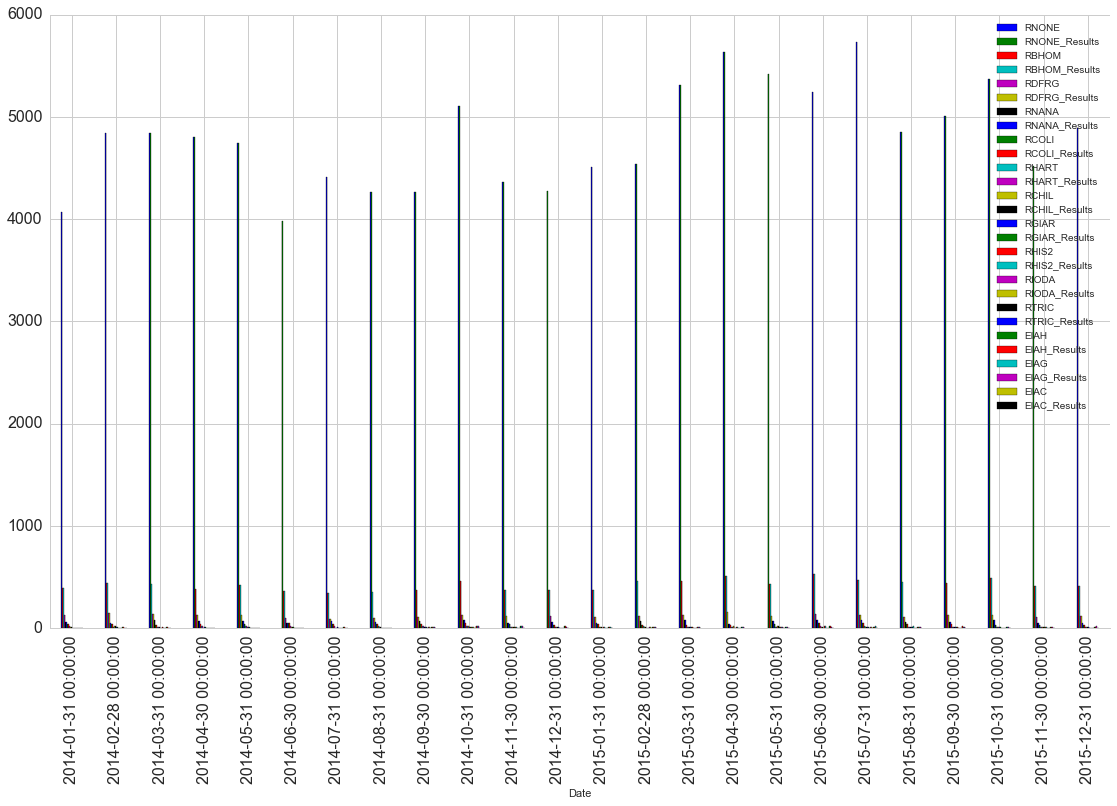

In [85]:
sns.set_style("whitegrid")

new.groupby("Date").count().resample("M", how="sum").drop(["Order", "Ward Name"], axis=1).plot(kind="bar", figsize=[19,11], fontsize=16)
sns.despine()

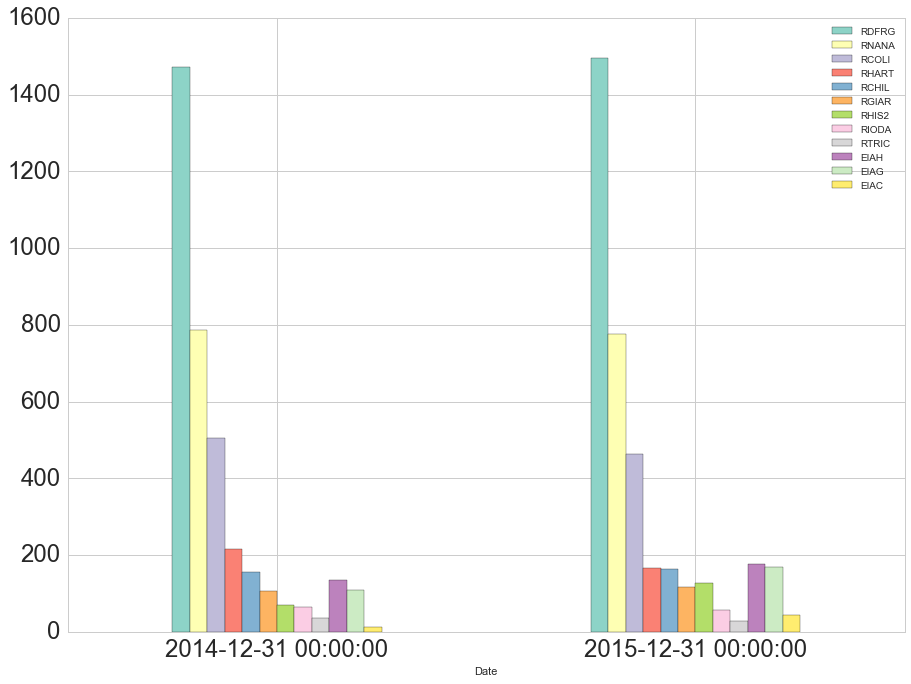

In [115]:
new.groupby("Date").count().resample("A", how="sum").drop(new.columns[::2], axis=1).drop(["RNONE", "RBHOM"], axis=1).plot(kind='bar', figsize=[15,11], rot=0, fontsize=24,color=sns.color_palette("Set3", 13))

In [138]:
new.to_excel("Results_Updated_2014_2015.xlsx")

In [562]:
RC = RNONE_RC.merge(RBHOM_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RDFRG_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RNANA_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RCOLI_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RHART_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RCHIL_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RGIAR_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RHIS2_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RIODA_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RTRIC_RC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(EIAG, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(EIAH, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(EIAC, how="outer", on=['Order', 'Date', 'Ward Name'])\

RC.ix[(RC.RNONE == "RNONE")& (RC.EIAC_Results == "Positive"), ["RNONE", "RNONE_Results"]] = np.nan
RC.ix[(RC.RNONE == "RNONE")& (RC.EIAH_Results == "Positive"), ["RNONE", "RNONE_Results"]] = np.nan
RC.ix[(RC.RNONE == "RNONE")& (RC.EIAG_Results == "Positive"), ["RNONE", "RNONE_Results"]] = np.nan
RC.ix[(RC.RNONE == "RNONE")& (RC.RBHOM == "RBHOM"), ["RNONE", "RNONE_Results"]] = np.nan
RC.ix[(RC.RNONE == "RNONE")& (RC.RNANA == "RNANA"), ["RNONE", "RNONE_Results"]] = np.nan
RC.ix[(RC.RNONE == "RNONE")& (RC.RTRIC == "RTRIC"), ["RNONE", "RNONE_Results"]] = np.nan

RC.ix[RC.RHIS2_Results == "MNY  T/C W/O RB", "RHIS2_Results"] = "MNY T/C W/O RBC"
RC.ix[RC.RHIS2_Results == "pending", "RHIS2_Results"] = "FEW T/C W/O RBC"
RC.ix[RC.RHIS2_Results == "RAR T  W/O RBC", "RHIS2_Results"] = "RAR T W/O RBC"
RC.ix[RC.RHIS2_Results == "RAR T  W/ RBC", "RHIS2_Results"] = "RAR T W/ RBC"

#RC = RC[~((RC.Order.isin(x.Order.value_counts()[:245].index)) & (RC.RNONE == "RNONE"))]
#merged = merged[~((merged.RNONE == "RNONE") & (merged.Order.isin(l)))]


In [8]:
from lightning import Lightning
import urllib.request

In [ ]:
from numpy import random, arange, asarray, corrcoef, argsort, array
import networkx as nx
from sklearn import datasets


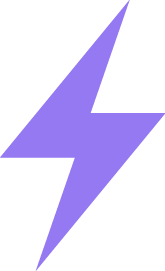

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [9]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')

In [15]:
import urllib.request
image_url = 'http://public.lightning-viz.org/visualizations/' + viz.id + '/screenshot/'
urllib.request.urlretrieve(image_url, "RedMatrix.png")

('RedMatrix.png', <http.client.HTTPMessage at 0x10cef3860>)

In [17]:
print(image_url)

http://public.lightning-viz.org/visualizations/bd29a2b6-cad2-4ad7-aea2-a35d1199a810/screenshot/


In [10]:
from seaborn import color_palette


In [174]:
d = map(lambda x: list(asarray(x)*255), color_palette('Blues', 5))
d
Exception: Invalid cmap '<map object at 0x10a420f98>',  must be one of {'Blues', 'RdYlGn', 'PuRd', 'PuOr',
                                                                        'Pastel1', 'Greens', 'GnBu', 'Oranges',
                                                                        'OrRd', 'YlGnBu', 'PuBuGn', 'Lightning', 
                                                                        'Accent', 'Set1', 'PRGn', 'PuBu', 'Dark2',
                                                                        'Paired', 'PiYG', 'Greys', 'Spectral', 
                                                                        'YlOrRd', 'BuGn', 'RdGy', 'YlOrBr', 'RdYlBu',
                                                                        'BuPu', 'BrBG', 'YlGn', 'Set3', 'RdPu', 
                                                                        'RdBu', 'Reds', 'Set2', 'Pastel2', 
                                                                        'Purples'}

In [169]:
color_palette("RdBu", n_colors=7)

[(0.73402539070914774, 0.1660899686462739, 0.20261438570770562),
 (0.89919262423234825, 0.51441754605255874, 0.40792005143913568),
 (0.98385236543767596, 0.80899655117708091, 0.71672435367808618),
 (0.96570549992954025, 0.96724336988785686, 0.96808919836493101),
 (0.75178778872770424, 0.86359093469731951, 0.92179931261960202),
 (0.40853519825374379, 0.66874281097860899, 0.81453288302702065),
 (0.15816994332799725, 0.43806229385675166, 0.69396387829500084)]

In [14]:
lgn.set_size('full')
viz = lgn.matrix(perc.T, row_labels=perc.T.index , column_labels=perc.T.index, numbers=True, colormap="Reds")


In [255]:
viz = lgn.matrix(perc.T, row_labels=perc.T.index , column_labels=perc.T.index, colormap="Reds", numbers=True, width=2500)

In [256]:
viz.id

'cdc56c9c-f56b-47cb-ad24-ba89cc7dee3d'

In [181]:
lgn.adjacency(c, numbers=True)

In [3]:
#Import all organisms, remove duplicates
from os import walk
mypath = "Update_Review/Sep/New"
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break
    
f.remove('Parasit_Master_Merge_2014_And_2015_Overlap_Update_Sep.xlsx')

names = []
for l in f:
    names.append(l[0:l.find('_')])
    
i = 0
for file in f:
    a = names[i]
    mp = mypath + "/" + file
    vars()[a] = pd.read_excel(mp, parse_dates=True)
    i = i + 1
    
for i in range(len(names)):
    print(names[i] + " - " + str(len(vars()[names[i]])) + " - " + str(len(vars()[names[i]].drop_duplicates(subset="Order"))))
    vars()[names[i]] = vars()[names[i]].drop_duplicates(subset="Order")
    
#Clean up data
RNONE = RNONE[RNONE.RNONE == "RNONE"]
RHIS3 = RHIS3[(RHIS3['Ward Name'] != "Test UK, MD") & (RHIS3['Ward Name'] != "Doctor, Test")]
CGC = CGC[(CGC["Ward Name"] != "Doctor, Test") & (CGC["Ward Name"] != "Test Doctor")]
C2EIC = C2EIC[(C2EIC["Ward Name"] != "Doctor, Test") & (C2EIC["Ward Name"] != "Test Doctor")]
C2EIG  = C2EIG[(C2EIG["Ward Name"] != "Doctor, Test") & (C2EIG["Ward Name"] != "Test Doctor")]
C2EIH = C2EIH[(C2EIH["Ward Name"] != "Doctor, Test") & (C2EIH["Ward Name"] != "Test Doctor")]
C2EIC = C2EIC[C2EIC.C2EIC_Results != "pending"]
C2EIC = C2EIC[C2EIC.C2EIC_Results != "pending*"]
C2EIG = C2EIG[C2EIG.C2EIG_Results != "pending"]
C2EIH = C2EIH[C2EIH.C2EIH_Results != "pending"]
CGC = CGC[CGC.CGC_Results != "pending"]
v2EIAH = v2EIAH[(v2EIAH["v2EIAH_Results"] != "pending*")]
v2EIAH = v2EIAH[(v2EIAH["v2EIAH_Results"] != "TEST PENDING")]
v2EIAC = v2EIAC[(v2EIAC["v2EIAC_Results"] != "pending*")]
v2EIAG = v2EIAG[(v2EIAG["v2EIAG_Results"] != "pending*")]
C2EIH.ix[C2EIH.C2EIH_Results == "Negative Negati", "C2EIH_Results"] = "Negative"
C2EIH.ix[C2EIH.C2EIH_Results == "NEGATIVE", "C2EIH_Results"] = "Negative"
C2EIH.ix[C2EIH.C2EIH_Results == "NEGATIVE ", "C2EIH_Results"] = "Negative"
C2EIC.ix[C2EIC.C2EIC_Results == "POSITIVE", "C2EIC_Results"] = "Positive"
C2EIG.ix[C2EIG.C2EIG_Results == "POSITIVE", "C2EIG_Results"] = "Positive"
C2EIG.ix[C2EIG.C2EIG_Results == "NEGATIVE", "C2EIG_Results"] = "Negative"
CGC.ix[CGC.CGC_Results == "NEGATIVE", "CGC_Results"] = "Negative"
CGC.ix[CGC.CGC_Results == "POSITIVE", "CGC_Results"] = "Positive"
CGC.ix[CGC.CGC_Results == "Negative Negati", "CGC_Results"] = "Negative"
CGC.ix[CGC.CGC_Results == "Positive Positi", "CGC_Results"] = "Positive"

#Select positive EIA Values, prefix variable name with "p"

z = ['CGC','C2EIC','C2EIG','C2EIH','EIAG', 'EIAC', 'v2EIAH','v2EIAC','v2EIAG']
t = ['pCGC','pC2EIC','pC2EIG','pC2EIH','pEIAG', 'pEIAC', 'pv2EIAH','pv2EIAC','pv2EIAG']
r = ['nCGC','nC2EIC','nC2EIG','nC2EIH','nEIAG','nEIAC', 'nv2EIAH','nv2EIAC','nv2EIAG']

for i in range(len(z)):
    vars()[t[i]] = vars()[z[i]][vars()[z[i]][("%s_Results"%z[i])] == "Positive"]
for i in range(len(z)):
    vars()[r[i]] = vars()[z[i]][vars()[z[i]][("%s_Results"%z[i])] == "Negative"]

    
#Concat RHIS2 and RHIS3, rename all RHIS3s to RHIS2s.
RHIS3.ix[RHIS3.RHIS3 == "RHIS3", "RHIS3"] = "RHIS2"
RHIS2 = pd.concat([RHIS2, RHIS3.rename(columns={'RHIS3':'RHIS2', 'RHIS3_Results':'RHIS2_Results'})], ignore_index=True)

PCEIAC.EIAC_Results = "Positive"
PCEIAG.EIAG_Results = "Positive"
PCEIAH.EIAH_Results = "Positive"

#Concat Giardia EIAs, duplicates removed
PEIAG = pd.concat([pv2EIAG.rename(columns={'v2EIAG':'EIAG', 'v2EIAG_Results':'EIAG_Results'}),
pC2EIG.rename(columns={'C2EIG':'EIAG', 'C2EIG_Results':'EIAG_Results'}), pEIAG, PCEIAG], ignore_index=True).drop_duplicates(subset="Order")

#Concat Crypto EIAs, dupilicates removed
PEIAC = pd.concat([pv2EIAC.rename(columns={'v2EIAC':'EIAC', 'v2EIAC_Results':'EIAC_Results'}),
pC2EIC.rename(columns={'C2EIC':'EIAC', 'C2EIC_Results':'EIAC_Results'}), PCEIAC], ignore_index=True).drop_duplicates(subset="Order")

#Concat Histo EIAs, duplicates removed
PEIAH = pd.concat([pv2EIAH.rename(columns={'v2EIAH':'EIAH', 'v2EIAH_Results':'EIAH_Results'}),
pC2EIH.rename(columns={'C2EIH':'EIAH', 'C2EIH_Results':'EIAH_Results'}), PCEIAH], ignore_index=True).drop_duplicates(subset="Order")

#Merge!
merged = RNONE.merge(RBHOM, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RDFRG, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RNANA, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RCOLI, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RHART, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RCHIL, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RGIAR, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RHIS2, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RIODA, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(RTRIC, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(PEIAH, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(PEIAG, how="outer", on=['Order', 'Date', 'Ward Name'])\
.merge(PEIAC, how="outer", on=['Order', 'Date', 'Ward Name'])

C2EIC - 60231 - 60214
C2EIG - 61413 - 60363
C2EIH - 60812 - 60327
CGC - 60271 - 59860
EIAC - 98 - 95
EIAG - 102 - 98
GIAR - 117 - 115
PCEIAC - 14 - 14
PCEIAG - 95 - 95
PCEIAH - 139 - 139
RBHOM - 9317 - 9317
RCHIL - 289 - 289
RCOLI - 907 - 907
RDFRG - 2725 - 2722
RGIAR - 195 - 195
RHART - 361 - 361
RHIS2 - 175 - 174
RHIS3 - 21 - 21
RIODA - 114 - 114
RNANA - 1459 - 1458
RNONE - 104815 - 104791
RTRIC - 62 - 62
v2EIAC - 31847 - 31846
v2EIAG - 32103 - 31995
v2EIAH - 31975 - 31975


In [197]:
for i in merged.columns[5::2]:
    print(i)

RBHOM
RDFRG
RNANA
RCOLI
RHART
RCHIL
RGIAR
RHIS2
RIODA
RTRIC
EIAH
EIAG
EIAC


In [9]:
merged[merged.RNONE != "RNONE"].describe()

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
count,12927,12927,12927,0,0,9345,9345,2725,2725,1458,1458,907,907,361,361,289,289,195,195,181,181,114,114,62,62,273,273,242,242,47,47
unique,12927,551,2419,0,0,1,4,1,4,1,13,1,12,1,11,1,12,1,12,1,17,1,13,1,4,3,1,3,1,2,1
top,I7310769,2014-02-05 00:00:00,Referring Atlanta,NaN,NaN,RBHOM,MOD,RDFRG,FEW TROPH(S),RNANA,FEW T/C,RCOLI,FEW T/C,RHART,FEW T/C,RCHIL,MOD T/C,RGIAR,RARE CYST(S),RHIS2,FEW T/C W/O RBC,RIODA,MOD T/C,RTRIC,MANY TROPH(S),2EIAH,Positive,C2EIG,Positive,C2EIC,Positive
freq,1,61,2171,NaN,NaN,9345,3018,2725,946,1458,290,907,222,361,89,289,60,195,46,181,54,114,29,62,20,153,273,136,242,29,47
first,NaN,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Create Summary Table
merged.describe().T['count'][5::2].sum()

16199

In [28]:
merged.describe().T.iloc[:,:4].to_csv("Sum_All.csv")

In [286]:
image_url

'http://public.lightning-viz.org/visualizations/a2537c0d-9296-40e0-b138-03a1817b2207/screenshot/'

In [285]:
import urllib.request
image_url = 'http://public.lightning-viz.org/visualizations/' + viz.id + '/screenshot/'
urllib.request.urlretrieve(image_url, "histtest1.png")

('histtest1.png', <http.client.HTTPMessage at 0x109445f98>)

In [294]:
lgn.histogram(np[np.Total > 44]["Percent"], zoom=False)

In [284]:
viz = lgn.histogram(np[np.Total > 44]["Percent"], description="# Daily Positivity Distribution", zoom=False)

In [258]:
#sns.set(style="whitegrid", color_codes=True)
sns.set(color_codes=True)

//anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [259]:
#New percent by samples, not organisms
np = merged.groupby("Date").count()
np = np[np.columns[0:30:2]]
np['Percent'] = ((np["Order"]-np["RNONE"])/np["Order"]*100)
np= np.rename(columns={"Order":"Total"})
#np['Percent'] = np.Percent.apply(lambda x: Decimal(x))
#np['Percent'] = np.Percent.apply(lambda x: round(x,1))
#np['Percent'] = np.Percent.astype(float)

In [292]:
np[np.Total > 44]["Percent"].describe()

count    533.000000
mean      11.113827
std        3.306358
min        1.190476
25%        9.090909
50%       10.784314
75%       12.698413
max       27.536232
Name: Percent, dtype: float64

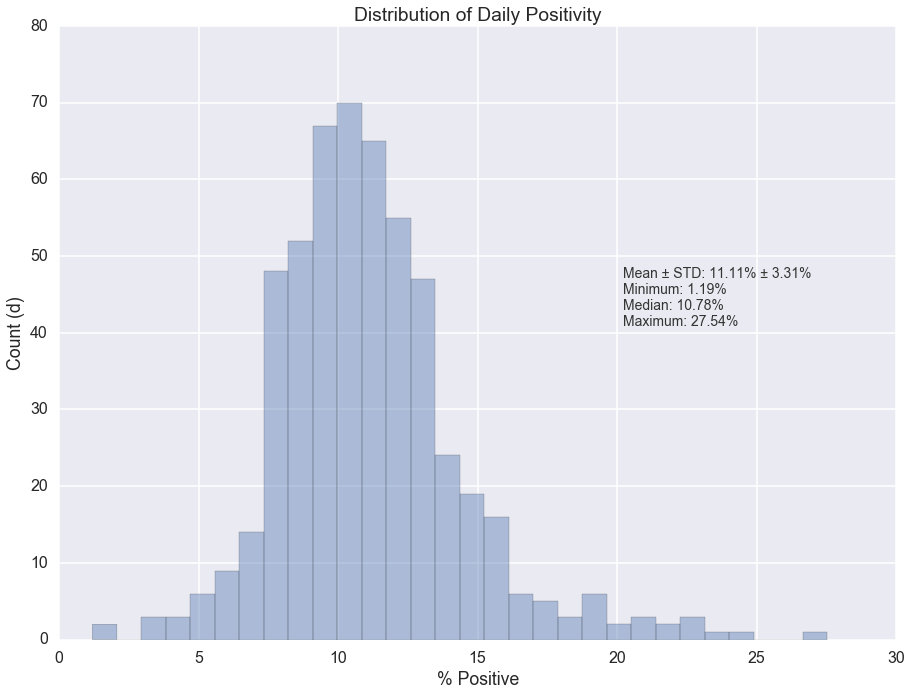

In [261]:
sns.set_context("poster")
plt.figure(figsize=(15, 11))
plt.title("Distribution of Daily Positivity")
plt.ylabel("Count (d)")
#plt.axvline(x=(np.Percent.mean() + np.Percent.std()),color='0.6',ls=':')
#plt.axvline(x=(np.Percent.mean() - np.Percent.std()),color='0.6',ls=':')
#plt.axvline(x=np.Percent.mean(),color='r',ls=':')
sns.distplot(np[np.Total > 44]["Percent"], kde=False)
plt.xlabel("% Positive")
plt.ylim([0,80])
plt.text(20.2,40.9,"Mean ± STD: 11.11% ± 3.31%\nMinimum: 1.19%\nMedian: 10.78%\nMaximum: 27.54%", fontsize=14,color="0.2", fontname='Arial')
#plt.savefig("DDP_by_Sample.png")

In [79]:
from decimal import Decimal
pbd = pd.DataFrame()

In [101]:
#Doesn't take into account multiple organisms in one sample

#Pos = merged[merged.columns[1:22:2]].drop("RNONE", axis=1).rename(columns={ "RBHOM":"Blastocystis hominis", 
                                                                          "RDFRG":"Dientamoeba fragilis",
                                                                          "RNANA":"Endolimax nana",
                                                                          "RCOLI":"Entamoeba coli",
                                                                          "RHART":"Entamoeba hartmanni", 
                                                                          "RCHIL":"Chilomastix mesnili", 
                                                                          "RGIAR": "Giardia lamblia", 
                                                                          "RHIS2":"Entamoeba histolytica/dispar", 
                                                                          "EIAH":"E. histolytica Enzyme Immunoassay (EIA)", 
                                                                          "EIAG":"Giardia lamblia EIA", 
                                                                          "EIAC":"Cryptosporidium hominis EIA", 
                                                                          "RIODA":"Iodamoeba butschlii", 
                                                                          "RTRIC":"Trichomonas hominis"})\
                                                                        .groupby("Date")\
                                                                        .count().sort_index()\
                                                                        .resample('D', how='sum')
#Tot = merged[merged.columns[1:22:2]].rename(columns={ "RBHOM":"Blastocystis hominis", 
                                                                          "RDFRG":"Dientamoeba fragilis",
                                                                          "RNANA":"Endolimax nana",
                                                                          "RCOLI":"Entamoeba coli",
                                                                          "RHART":"Entamoeba hartmanni", 
                                                                          "RCHIL":"Chilomastix mesnili", 
                                                                          "RGIAR": "Giardia lamblia", 
                                                                          "RHIS2":"Entamoeba histolytica/dispar", 
                                                                          "EIAH":"E. histolytica Enzyme Immunoassay (EIA)", 
                                                                          "EIAG":"Giardia lamblia EIA", 
                                                                          "EIAC":"Cryptosporidium hominis EIA", 
                                                                          "RIODA":"Iodamoeba butschlii", 
                                                                          "RTRIC":"Trichomonas hominis"})\
                                                                        .groupby("Date")\
                                                                        .count().sort_index()\
                                                                        .resample('D', how='sum')
            
#Tot = Tot.dropna()
#Pos = Pos.dropna()
#pbd['Date'] = ((Pos.sum(axis=1)/Tot.sum(axis=1))*100).index
#pbd['Positive'] = Pos.sum(axis=1).values
#pbd['Total'] = Tot.sum(axis=1).values
#pbd['Percent'] = ((Pos.sum(axis=1)/Tot.sum(axis=1))*100).values
#pbd['Percent'] = pbd.Percent.apply(lambda x: Decimal(x))
#pbd['Percent'] = pbd.Percent.apply(lambda x: round(x,1))
#pbd['Percent'] = pbd.Percent.astype(float)
#pbd[pbd.Positive > 50]
#sns.set_context("poster")
#plt.figure(figsize=(8, 6))
#plt.title("Distribution of Daily Positivity")
#plt.ylabel("Count (d)")
#plt.axvline(x=(pbd.Percent.mean() + pbd.Percent.std()),color='0.6',ls='dashed')
#plt.axvline(x=(pbd.Percent.mean() - pbd.Percent.std()),color='0.6',ls='dashed')
#plt.axvline(x=pbd.Percent.mean(),color='r',ls='dashed')
#sns.distplot(pbd[pbd.Total > 44]['Percent'], kde=False)
#plt.xlabel("% Positive")
#plt.savefig("DDP.png")

In [238]:
merged.describe()

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
count,118364,118364,118364,105437,105437,9345,9345,2725,2725,1458,1458,907,907,361,361,289,289,195,195,181,181,114,114,62,62,273,273,242,242,47,47
unique,118364,565,6146,1,1,1,4,1,4,1,13,1,12,1,11,1,12,1,12,1,17,1,13,1,4,1,1,1,1,1,1
top,H2120421,2014-02-05 00:00:00,Referring Atlanta,RNONE,NONE,RBHOM,MOD,RDFRG,FEW TROPH(S),RNANA,FEW T/C,RCOLI,FEW T/C,RHART,FEW T/C,RCHIL,MOD T/C,RGIAR,RARE CYST(S),RHIS2,FEW T/C W/O RBC,RIODA,MOD T/C,RTRIC,MANY TROPH(S),EIAH,Positive,EIAG,Positive,EIAC,Positive
freq,1,517,24765,105437,105437,9345,3018,2725,946,1458,290,907,222,361,89,289,60,195,46,181,54,114,29,62,20,273,273,242,242,47,47
first,NaN,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
perc.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
BHOM,100.0000,10.1766,8.3146,4.1413,1.8192,0.9524,0.7170,0.6742,0.8882,0.1070,0.5243,0.6956,0.0535
DFRG,34.8991,100.0000,8.7339,2.9725,1.7248,0.6239,0.7706,0.2936,0.7706,0.0734,0.2569,0.6972,0.0367
NANA,53.2922,16.3237,100.0000,7.9561,6.3100,1.8519,1.3032,1.3032,2.5377,0.3429,0.7545,1.0974,0.0686
COLI,42.6681,8.9305,12.7894,100.0000,7.1665,1.6538,1.2128,2.3153,2.0948,0.2205,2.0948,1.2128,0.1103
HART,47.0914,13.0194,25.4848,18.0055,100.0000,2.7701,2.7701,4.7091,4.4321,0.2770,3.8781,1.9391,0.0000
CHIL,30.7958,5.8824,9.3426,5.1903,3.4602,100.0000,1.3841,1.3841,0.3460,2.0761,0.3460,1.0381,0.3460
GIAR,34.3590,10.7692,9.7436,5.6410,5.1282,2.0513,100.0000,2.5641,4.1026,0.5128,2.0513,77.9487,1.0256
HIS2,34.8066,4.4199,10.4972,11.6022,9.3923,2.2099,2.7624,100.0000,1.1050,1.1050,72.3757,1.6575,0.0000
IODA,72.8070,18.4211,32.4561,16.6667,14.0351,0.8772,7.0175,1.7544,100.0000,0.8772,0.0000,4.3860,0.8772
TRIC,16.1290,3.2258,8.0645,3.2258,1.6129,9.6774,1.6129,3.2258,1.6129,100.0000,0.0000,0.0000,0.0000


In [12]:
#Create correlation table
mer = merged
mer.loc[mer.EIAH == "2EIAH", "EIAH"] = "EIAH"
mer.loc[mer.EIAH == "C2EIH", "EIAH"] = "EIAH"
mer.loc[mer.EIAG == "2EIAG", "EIAG"] = "EIAG"
mer.loc[mer.EIAG == "C2EIG", "EIAG"] = "EIAG"
mer.loc[mer.EIAC == "C2EIC", "EIAC"] = "EIAC"
mer.loc[mer.EIAC == "2EIAC", "EIAC"] = "EIAC"


c = pd.DataFrame()
for i in mer.columns[5::2]:
    z = mer[mer["%s"%i]=="%s"%i].describe()
    c = pd.concat([c, z])
c = c.loc[:,"RBHOM"::2][0::6]
c.index = c.columns.T
for i,y in enumerate(c.columns[:-3]):
    c.columns.values[i] = c.columns.values[i][1:]
c = c.astype(int)

z = 0
l = []
perc = pd.DataFrame()
for z, y in enumerate(c.columns):
    l = []
    for i, y in enumerate(c.iloc[z, :]):
        a = '{0:.4f}'.format((y/c.iloc[z,z])*100)
        l.append(a)
    
    perc["%s"%c.columns[z]] = l 
    z = z+1  
    
for z,y in enumerate (c.columns):
    c.iloc[:,z] = c.iloc[:,z].map(str) + " (" + perc.T[z].map(str) +")"
    

#c.to_csv("Update_Review/Sep/Files_to_Use/Multi_Infect.csv")
c

,BHOM,DFRG,NANA,COLI,HART,CHIL,GIAR,HIS2,IODA,TRIC,EIAH,EIAG,EIAC
BHOM,9345 (100.0000),951 (10.1766),777 (8.3146),387 (4.1413),170 (1.8192),89 (0.9524),67 (0.7170),63 (0.6742),83 (0.8882),10 (0.1070),49 (0.5243),65 (0.6956),5 (0.0535)
DFRG,951 (34.8991),2725 (100.0000),238 (8.7339),81 (2.9725),47 (1.7248),17 (0.6239),21 (0.7706),8 (0.2936),21 (0.7706),2 (0.0734),7 (0.2569),19 (0.6972),1 (0.0367)
NANA,777 (53.2922),238 (16.3237),1458 (100.0000),116 (7.9561),92 (6.3100),27 (1.8519),19 (1.3032),19 (1.3032),37 (2.5377),5 (0.3429),11 (0.7545),16 (1.0974),1 (0.0686)
COLI,387 (42.6681),81 (8.9305),116 (12.7894),907 (100.0000),65 (7.1665),15 (1.6538),11 (1.2128),21 (2.3153),19 (2.0948),2 (0.2205),19 (2.0948),11 (1.2128),1 (0.1103)
HART,170 (47.0914),47 (13.0194),92 (25.4848),65 (18.0055),361 (100.0000),10 (2.7701),10 (2.7701),17 (4.7091),16 (4.4321),1 (0.2770),14 (3.8781),7 (1.9391),0 (0.0000)
CHIL,89 (30.7958),17 (5.8824),27 (9.3426),15 (5.1903),10 (3.4602),289 (100.0000),4 (1.3841),4 (1.3841),1 (0.3460),6 (2.0761),1 (0.3460),3 (1.0381),1 (0.3460)
GIAR,67 (34.3590),21 (10.7692),19 (9.7436),11 (5.6410),10 (5.1282),4 (2.0513),195 (100.0000),5 (2.5641),8 (4.1026),1 (0.5128),4 (2.0513),152 (77.9487),2 (1.0256)
HIS2,63 (34.8066),8 (4.4199),19 (10.4972),21 (11.6022),17 (9.3923),4 (2.2099),5 (2.7624),181 (100.0000),2 (1.1050),2 (1.1050),131 (72.3757),3 (1.6575),0 (0.0000)
IODA,83 (72.8070),21 (18.4211),37 (32.4561),19 (16.6667),16 (14.0351),1 (0.8772),8 (7.0175),2 (1.7544),114 (100.0000),1 (0.8772),0 (0.0000),5 (4.3860),1 (0.8772)
TRIC,10 (16.1290),2 (3.2258),5 (8.0645),2 (3.2258),1 (1.6129),6 (9.6774),1 (1.6129),2 (3.2258),1 (1.6129),62 (100.0000),0 (0.0000),0 (0.0000),0 (0.0000)


In [471]:
c.EIAG

BHOM       65 (0.6956)
DFRG       19 (0.6972)
NANA       16 (1.0974)
COLI       11 (1.2128)
HART        7 (1.9391)
CHIL        3 (1.0381)
GIAR     152 (77.9487)
HIS2        3 (1.6575)
IODA        5 (4.3860)
TRIC        0 (0.0000)
EIAH        5 (1.8315)
EIAG    242 (100.0000)
EIAC      12 (25.5319)
Name: EIAG, dtype: object

In [5]:
#merged[merged.RNONE != "RNONE"]['Ward Name'].value_counts()

In [56]:
#Positivity by Ward
from decimal import Decimal
pbw = pd.DataFrame(merged[merged.RNONE != "RNONE"]['Ward Name'].value_counts())
pbw["Total"] = merged["Ward Name"].value_counts()
pbw = pbw.reset_index().rename(columns={"index":"Ward Name", "Ward Name": "Positive"})

pbw['Percentage'] = (pbw.Positive/pbw.Total)*100
pbw["Dec"] = pbw["Percentage"].apply(lambda x: Decimal(x))
pbw["Round"] = pbw["Dec"].apply(lambda x: round(x,1))
pbw = pbw.drop("Percentage", axis=1)
pbw = pbw.drop("Dec", axis=1)
pbw = pbw.rename(columns={"Round":"Percent"})
pbw = pbw.sort_values(by=["Total", "Percent"], ascending=False)
pbw.sort_values(by=["Total","Percent"])
pbw[pbw.Total > 1000]

In [127]:
test.sort_values(by="Percent", ascending =False).reset_index(drop=True)

,Ward Name,Positive,Total,Percent
0,Genova Europe (UK),1394,4235,32.9
1,Lab1 AS (Norway),285,1057,27.0
2,MDD Healthcare (Finland),230,1002,23.0
3,Referring Atlanta (USA),2171,24549,8.8


In [128]:
test

,Ward Name,Positive,Total,Percent
0,Referring Atlanta (USA),2171,24549,8.8
1,Genova Europe (UK),1394,4235,32.9
2,Lab1 AS (Norway),285,1057,27.0
3,MDD Healthcare (Finland),230,1002,23.0


In [186]:
i="RBHOM"
a="RDFRG"
g = "RGIAR"
t = merged[merged["%s"%i]=="%s"%i].describe()
z = merged[merged["%s"%a]=="%s"%a].describe()
g = merged[merged["%s"%g]=="%s"%g].describe()
pd.concat([t,z,g]).loc[:,"RBHOM"::2][0::6]


,RBHOM,RDFRG,RNANA,RCOLI,RHART,RCHIL,RGIAR,RHIS2,RIODA,RTRIC,EIAH,EIAG,EIAC
count,9345,951,777,387,170,89,67,63,83,10,49,65,5
count,951,2725,238,81,47,17,21,8,21,2,7,19,1
count,67,21,19,11,10,4,195,5,8,1,4,152,2


In [4]:
merged.describe()

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,...,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
count,118051,118051,118051,105124,105124,9345,9345,2725,2725,1458,...,114,114,62,62,273,273,242,242,47,47
unique,118051,565,6145,1,1,1,4,1,4,1,...,1,13,1,4,3,1,3,1,2,1
top,I7030164,2014-02-05 00:00:00,Referring Atlanta,RNONE,NONE,RBHOM,MOD,RDFRG,FEW TROPH(S),RNANA,...,RIODA,MOD T/C,RTRIC,MANY TROPH(S),2EIAH,Positive,C2EIG,Positive,C2EIC,Positive
freq,1,517,24549,105124,105124,9345,3018,2725,946,1458,...,114,29,62,20,153,273,136,242,29,47
first,NaN,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in merged.columns[3::2]:
    print(merged[merged["%s"%i]=="%s"%i].describe())
    
for i in merged.columns[3::2]:
    print(merged["%s_Results"%i].describe())

In [ ]:
#Set EIA name to EIA, get secondary organisms and number relative to primary organism; compile to table, calculate percentages, export to Excel. 
merged.loc[merged.EIAG.notnull(), 'EIAG'] = "EIAG"
merged.loc[merged.EIAH.notnull(), "EIAH"] = "EIAH"
merged.loc[merged.EIAC.notnull(), "EIAC"] = "EIAC"

In [12]:
merged.describe()



,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
count,118051,118051,118051,105124,105124,9345,9345,2725,2725,1458,1458,907,907,361,361,289,289,195,195,181,181,114,114,62,62,273,273,242,242,47,47
unique,118051,565,6145,1,1,1,4,1,4,1,13,1,12,1,11,1,12,1,12,1,17,1,13,1,4,3,1,3,1,2,1
top,I2110228,2014-02-05 00:00:00,Referring Atlanta,RNONE,NONE,RBHOM,MOD,RDFRG,FEW TROPH(S),RNANA,FEW T/C,RCOLI,FEW T/C,RHART,FEW T/C,RCHIL,MOD T/C,RGIAR,RARE CYST(S),RHIS2,FEW T/C W/O RBC,RIODA,MOD T/C,RTRIC,MANY TROPH(S),2EIAH,Positive,C2EIG,Positive,C2EIC,Positive
freq,1,517,24549,105124,105124,9345,3018,2725,946,1458,290,907,222,361,89,289,60,195,46,181,54,114,29,62,20,153,273,136,242,29,47
first,NaN,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
merged[merged.columns[1::2]].describe()

,Date,RNONE,RBHOM,RDFRG,RNANA,RCOLI,RHART,RCHIL,RGIAR,RHIS2,RIODA,RTRIC,EIAH,EIAG,EIAC
count,118051,105124,9345,2725,1458,907,361,289,195,181,114,62,273,242,47
unique,565,1,1,1,1,1,1,1,1,1,1,1,3,3,2
top,2014-02-05 00:00:00,RNONE,RBHOM,RDFRG,RNANA,RCOLI,RHART,RCHIL,RGIAR,RHIS2,RIODA,RTRIC,2EIAH,C2EIG,C2EIC
freq,517,105124,9345,2725,1458,907,361,289,195,181,114,62,153,136,29
first,2014-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
len(merged[merged.RNONE!="RNONE"].groupby("Date").count().sort_index().resample("M", how="sum").iloc[:,0:31:2].drop(["Order", "RNONE"],axis=1).sum(axis=1))

22

In [369]:
a = merged[merged.RNONE!="RNONE"].groupby("Date").count().sort_index().resample("M", how="sum").iloc[:,0:31:2].drop(["Order", "RNONE"],axis=1).sum(axis=1)

In [421]:
b = merged.groupby("Date").count().sort_index().resample("M", how="sum")["RNONE"]

In [423]:
d = merged.groupby("Date").count().sort_index().resample("M", how="sum")["Order"]

In [418]:
c = (z.iloc[:,0]/z["Total"])*100
(c - c.mean())
c.max()


14.565323764475616

In [432]:
c = (d-b)
h = (c/d)*100
v = (h - h.mean())/(h.max()-h.min())

In [379]:
v = (c - c.mean())/(c.max()-c.min())

In [448]:
662/6397

0.10348600906675004

In [450]:
712/5950

0.11966386554621848

In [452]:
import urllib.request
image_url = 'http://public.lightning-viz.org/visualizations/' + viz.id + '/screenshot/'
urllib.request.urlretrieve(image_url, "scattertest.png")

('scattertest.png', <http.client.HTTPMessage at 0x1095223c8>)

In [451]:
viz = lgn.scatter(c,d,xaxis='Total Positive Per Month', yaxis='Total Samples Per Month', values=v.values, colormap='YlOrRd')

In [437]:
lgn.scatter(merged[merged.RNONE!="RNONE"].groupby("Date").count().sort_index().resample("M", how="sum").iloc[:,0:31:2].drop(["Order", "RNONE"],axis=1).sum(axis=1), merged.groupby("Date").count().sort_index().resample("M", how="sum")["RNONE"].values,xaxis='Total Positive Per Month', yaxis='Total Negative Per Month', values=v.values, colormap='YlOrRd')

In [303]:
lgn.line(merged[merged.columns[1:22:2]].drop("RNONE", axis=1).rename(columns={ "RBHOM":"Blastocystis hominis", 
                                                                          "RDFRG":"Dientamoeba fragilis",
                                                                          "RNANA":"Endolimax nana",
                                                                          "RCOLI":"Entamoeba coli",
                                                                          "RHART":"Entamoeba hartmanni", 
                                                                          "RCHIL":"Chilomastix mesnili", 
                                                                          "RGIAR": "Giardia lamblia", 
                                                                          "RHIS2":"Entamoeba histolytica/dispar", 
                                                                          "EIAH":"E. histolytica Enzyme Immunoassay (EIA)", 
                                                                          "EIAG":"Giardia lamblia EIA", 
                                                                          "EIAC":"Cryptosporidium hominis EIA", 
                                                                          "RIODA":"Iodamoeba butschlii", 
                                                                          "RTRIC":"Trichomonas hominis"})\
                                                                        .drop("Blastocystis hominis", axis=1)\
                                                                        .drop("Dientamoeba fragilis", axis=1)\
                                                                        .drop("Endolimax nana", axis=1)\
                                                                        .drop("Entamoeba coli", axis=1)\
                                                                        .groupby("Date")\
                                                                        .count().sort_index()\
                                                                        .resample('M', how='sum').T)

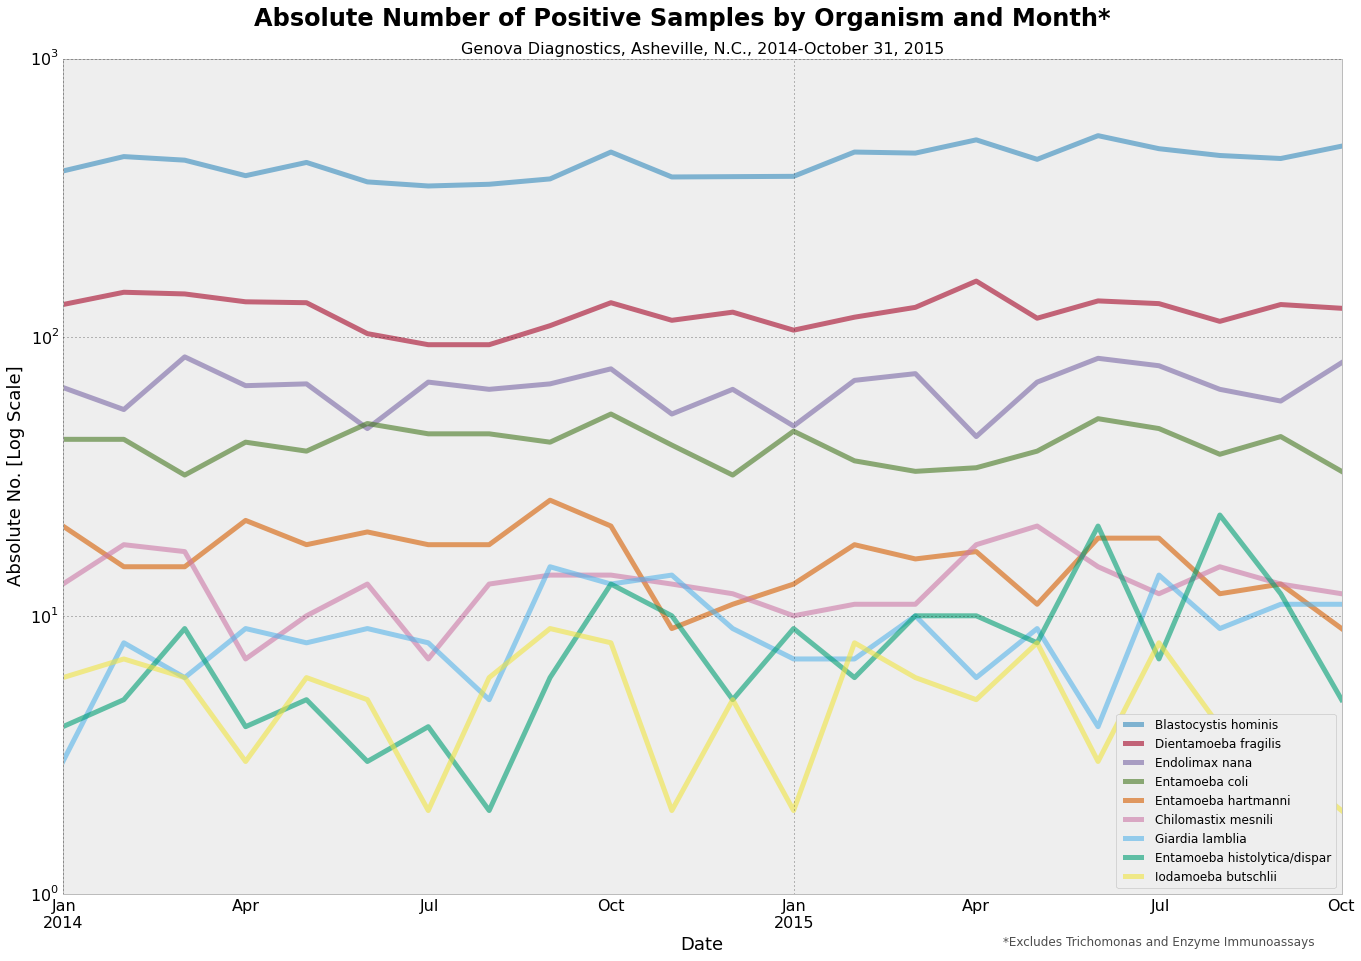

In [6]:
#Cycle throught styles bmh->fivethirtyeight->ggplot->bmh to get desired look
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax.xaxis.set_ticks_position('top')
#ax.yaxis.grid(linestyle = '-', color = 'gray')
#ax.invert_yaxis()
#fig=plt.figure()
plt.style.use('bmh') 
ax = merged[merged.columns[1:22:2]].drop("RNONE", axis=1).rename(columns={ "RBHOM":"Blastocystis hominis", 
                                                                          "RDFRG":"Dientamoeba fragilis",
                                                                          "RNANA":"Endolimax nana",
                                                                          "RCOLI":"Entamoeba coli",
                                                                          "RHART":"Entamoeba hartmanni", 
                                                                          "RCHIL":"Chilomastix mesnili", 
                                                                          "RGIAR": "Giardia lamblia", 
                                                                          "RHIS2":"Entamoeba histolytica/dispar", 
                                                                          "EIAH":"E. histolytica Enzyme Immunoassay (EIA)", 
                                                                          "EIAG":"Giardia lamblia EIA", 
                                                                          "EIAC":"Cryptosporidium hominis EIA", 
                                                                          "RIODA":"Iodamoeba butschlii", 
                                                                          "RTRIC":"Trichomonas hominis"})\
                                                                        .groupby("Date")\
                                                                        .count().sort_index()\
                                                                        .resample('M', how='sum')\
                                                                        .plot(figsize=(19,13), 
                                                                              alpha=0.6, 
                                                                              linewidth=5, 
                                                                              fontsize=16)
plt.yscale('log')
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  
#plt.tick_params(axis='both', which='major', labelsize=14)
#plt.tick_params(axis='both', which='minor', labelsize=14)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)
#ax1.grid(b=True, which='minor')
#ax1.grid(b=True, which='major', color="0.7", linestyle='--')
#for i, y in enumerate(ax):
    #ax[i].set_xlabel("", fontsize="16")
    #ax[i].set_ylabel("Absolute No.")
    #ax[i].legend(loc='lower right')


#ax[i].xaxis.tick_top()
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
plt.ylabel('Absolute No. [Log Scale]', fontsize="18")
plt.xlabel('Date',fontsize="18")
ax.get_figure().suptitle('Absolute Number of Positive Samples by Organism and Month*', fontsize=24,fontweight='bold', y=1.025)
ax.set_title("Genova Diagnostics, Asheville, N.C., 2014-October 31, 2015", fontsize=16)
#ax[3].legend(loc='lower right')
#ax[0].legend(loc='lower right')
#ax[8].legend(loc='lower right')
#ax[10].legend(loc='lower right')
#ax[11].legend(loc='lower right')
#ax[13].legend(loc='lower right')



plt.tight_layout()
ax.get_figure().text(0.735,0.022,"*Excludes Trichomonas and Enzyme Immunoassays", fontsize=12, color="0.3")

plt.savefig("test3.png", bbox_inches='tight')


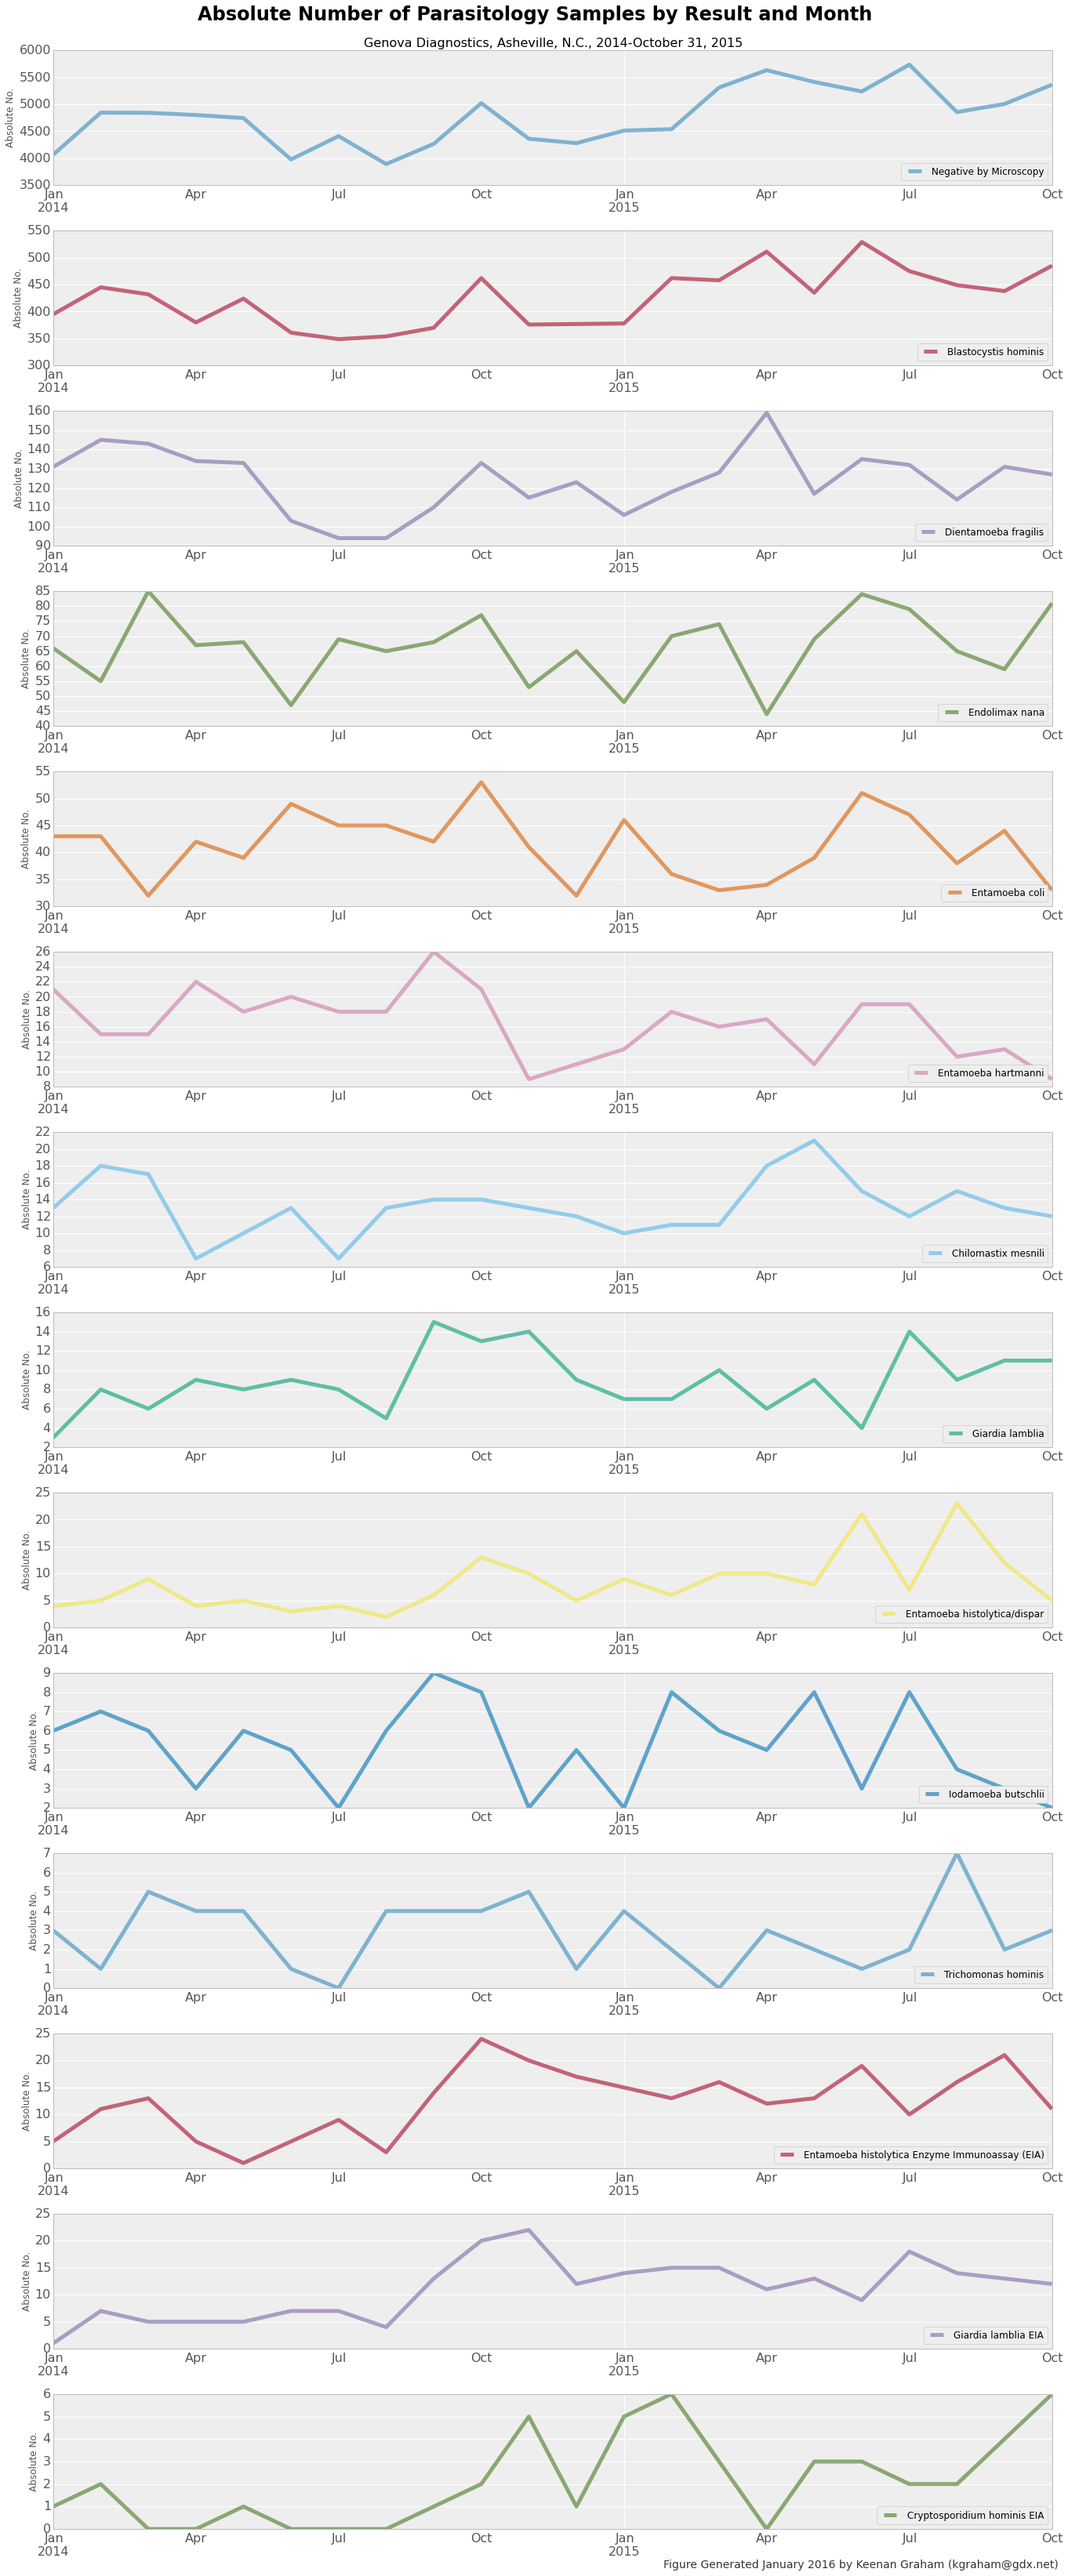

In [68]:
#Cycle throught styles bmh->fivethirtyeight->ggplot->bmh to get desired look
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
#ax.xaxis.set_ticks_position('top')
#ax.yaxis.grid(linestyle = '-', color = 'gray')
#ax.invert_yaxis()
#fig=plt.figure()
plt.style.use('bmh') 
ax = merged[merged.columns[1:31:2]].rename(columns={"RNONE":"Negative by Microscopy", "RBHOM":"Blastocystis hominis", "RDFRG":"Dientamoeba fragilis","RNANA":"Endolimax nana","RCOLI":"Entamoeba coli","RHART":"Entamoeba hartmanni", "RCHIL":"Chilomastix mesnili", "RGIAR": "Giardia lamblia", "RHIS2":"Entamoeba histolytica/dispar", "EIAH":"Entamoeba histolytica Enzyme Immunoassay (EIA)", "EIAG":"Giardia lamblia EIA", "EIAC":"Cryptosporidium hominis EIA", "RIODA":"Iodamoeba butschlii", "RTRIC":"Trichomonas hominis"}).groupby("Date").count().sort_index().resample('M', how='sum').plot(figsize=(19,45), alpha=0.6, linewidth=5, subplots=True, sharex=False, fontsize=16)
#plt.yscale('log')
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")  
#plt.tick_params(axis='both', which='major', labelsize=14)
#plt.tick_params(axis='both', which='minor', labelsize=14)
#ax1.spines['right'].set_visible(False)
#ax1.spines['top'].set_visible(False)
#ax1.spines['left'].set_visible(False)
#ax1.spines['bottom'].set_visible(True)
#ax1.grid(b=True, which='minor')
#ax1.grid(b=True, which='major', color="0.7", linestyle='--')
for i, y in enumerate(ax):
    ax[i].set_xlabel("", fontsize="16")
    ax[i].set_ylabel("Absolute No.")
    ax[i].legend(loc='lower right')


#ax[i].xaxis.tick_top()
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)
#plt.ylabel('Absolute No. [Log Scale]', fontsize="18")
#plt.xlabel('Date',fontsize="18")
ax[0].get_figure().suptitle('Absolute Number of Parasitology Samples by Result and Month', fontsize=24,fontweight='bold', y=1.009)
ax[0].set_title("Genova Diagnostics, Asheville, N.C., 2014-October 31, 2015", fontsize=16)
#ax[3].legend(loc='lower right')
#ax[0].legend(loc='lower right')
#ax[8].legend(loc='lower right')
#ax[10].legend(loc='lower right')
#ax[11].legend(loc='lower right')
#ax[13].legend(loc='lower right')



plt.tight_layout()
ax[0].get_figure().text(0.62,0,"Figure Generated January 2016 by Keenan Graham (kgraham@gdx.net)", fontsize=14, color="0.2")

plt.savefig("test2.png", bbox_inches='tight')


In [ ]:
pd.scatter_matrix(merged[merged.columns[1:22:2]].drop("RNONE", axis=1).groupby("Date").count().sort_index().resample('M', how='sum'), alpha=0.2, figsize=(19, 13), diagonal='kde')

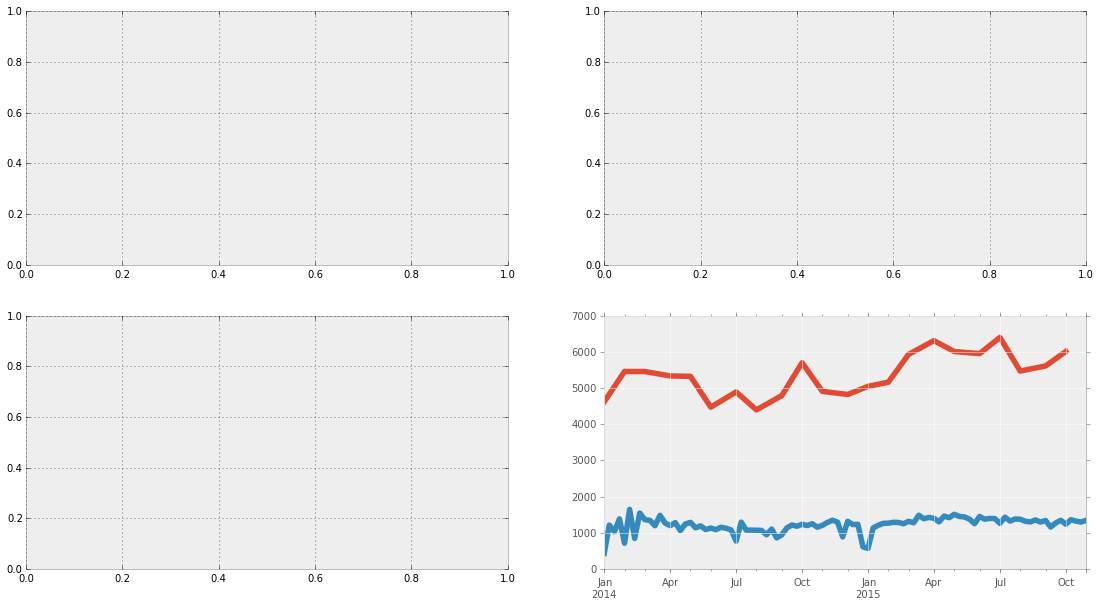

In [27]:
merged.Date.value_counts().sort_index()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.style.use('ggplot') 
merged.Date.value_counts().sort_index().resample('M', how='sum').plot(linewidth=5.5, figsize=(19,10))
merged.Date.value_counts().sort_index().resample('W', how='sum').plot(linewidth=5.5, figsize=(19,10))

In [7]:
merged[merged.columns[1:31:2]].rename(columns={"RNONE":"Negative by Microscopy", "RBHOM":"Blastocystis hominis", "RDFRG":"Dientamoeba fragilis","RNANA":"Endolimax nana","RCOLI":"Entamoeba coli","RHART":"Entamoeba hartmanni", "RCHIL":"Chilomastix mesnili", "RGIAR": "Giardia lamblia", "RHIS2":"Entamoeba histolytica/dispar", "EIAH":"Entamoeba histolytica Enzyme Immunoassay (EIA)", "EIAG":"Giardia lamblia EIA", "EIAC":"Cryptosporidium hominis EIA", "RIODA":"Iodamoeba butschlii", "RTRIC":"Trichomonas hominis"}).groupby("Date").count().sort_index().resample('M', how='sum').to_excel("Parasit_Results_by_Month_2014_Oct_2015.xlsx")

In [6]:

plt.figure(figsize=(12,6))

ax = merged.plot(kind='bar')
plt.ylabel("")
plt.title("")
plt.xticks(rotation=0)
plt.xlabel('')

rects = ax.patches

def autolabel(rects):
    """Attach some labels."""

    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., height - .3, '%0.1f'%height,
              ha='center', va='top', fontsize=14, color='w')

NameError: name 'merged' is not defined

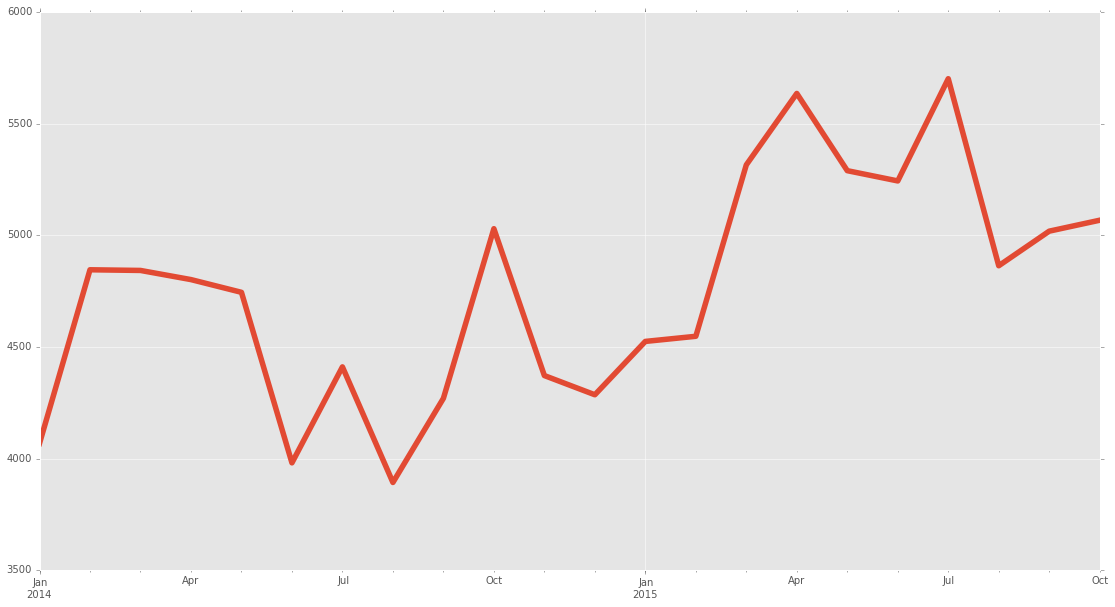

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
RNONE.Date.value_counts().resample('M', how='sum').plot(linewidth=5.5, figsize=(19,10))

df3.plot(x='A', y='B')

In [29]:
for i in range(len(names)):
    print(names[i]+":")
    print(vars()[names[i]].describe())
    print('\n \n \n')
   

C2EIC:
           Order                 Date             Ward Name  C2EIC  \
count      59822                59822                 59822  59822   
unique     59822                  357                  4222      1   
top     I1230126  2015-05-28 00:00:00  UltraWellness Center  C2EIC   
freq           1                  421                   760  59822   
first        NaN  2014-09-02 00:00:00                   NaN    NaN   
last         NaN  2015-10-31 00:00:00                   NaN    NaN   

       C2EIC_Results  
count          59822  
unique             2  
top         Negative  
freq           59794  
first            NaN  
last             NaN  

 
 

C2EIG:
           Order                 Date  Ward Name  C2EIG C2EIG_Results
count      60183                60183      60183  60183         60183
unique     60183                  358       4222      1             2
top     I1230126  2015-05-28 00:00:00  Client QA  C2EIG      Negative
freq           1                  421        764

In [31]:
for i in range(len(names)):
    if names[i] != "GIAR" and names[i] != "PCEIAC" and names[i] != "PCEIAG" and names[i] != "PCEIAH" and names[i]:
        print(vars()[names[i]]["%s_Results"%names[i]].value_counts())

Negative    59794
Positive       28
Name: C2EIC_Results, dtype: int64
Negative    60047
Positive      136
Name: C2EIG_Results, dtype: int64
Negative    60147
Positive      113
Name: C2EIH_Results, dtype: int64
Negative    59488
Positive      210
Name: CGC_Results, dtype: int64
Negative    95
Name: EIAC_Results, dtype: int64
Negative    95
Positive     3
Name: EIAG_Results, dtype: int64
MOD     3007
MANY    2949
FEW     2669
RARE     692
Name: RBHOM_Results, dtype: int64
MOD T/C          60
FEW T/C          58
MANY T/C         41
MOD TROPH(S)     34
MANY TROPH(S)    26
FEW TROPH(S)     26
RARE TROPH(S)    19
RARE T/C         11
MOD CYST(S)       4
RARE CYST(S)      4
FEW CYST(S)       3
MANY CYST(S)      3
Name: RCHIL_Results, dtype: int64
FEW T/C          222
RARE TROPH(S)    132
FEW TROPH(S)     129
RARE T/C          99
MOD T/C           85
RARE CYST(S)      76
FEW CYST(S)       60
MOD TROPH(S)      50
MANY T/C          23
MOD CYST(S)       16
MANY TROPH(S)     14
MANY CYST(S)       1

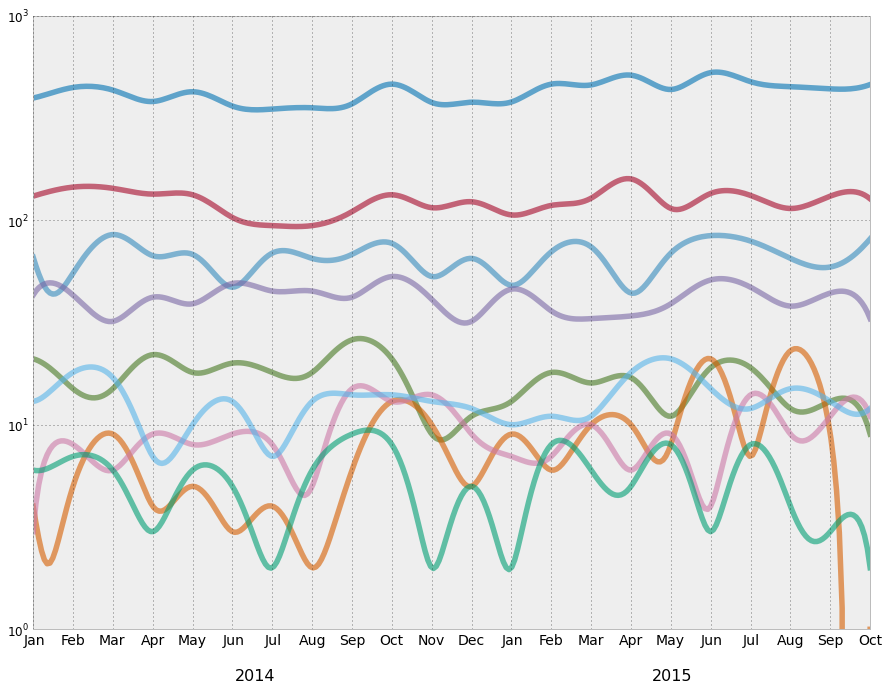

In [195]:

fig = plt.figure(figsize=(15,11))
orgs = [RNANA, RDFRG, RCOLI, RHART, RHIS2, RGIAR, RCHIL, RIODA, RTRIC, RBHOM]
for org in orgs:

    x_smooth = np.linspace(0, len(org.Date.value_counts().resample('M', how='sum'))-1, 300)
    #np.arange(0,len(org.Date.value_counts().resample('M', how='sum'))-1)
    y_smooth = spline(np.arange(0,len(org.Date.value_counts().resample('M', how='sum'))),org.Date.value_counts().resample('M', how='sum'), 
                      x_smooth)

    plt.plot(x_smooth, y_smooth ,linewidth=5.5, alpha=0.6)

x = np.arange(0,len(org.Date.value_counts().resample('M', how='sum')))

plt.xticks(x, org.Date.value_counts().resample('M', how='sum').index.strftime("%b"), rotation='0')
#plt.ylim([0,org.Date.value_counts().resample('M', how='sum').max()+75])
plt.yscale('log')#, nonposy='clip')
#from matplotlib.ticker import ScalarFormatter
#ax = fig.gca().yaxis
#ax.set_major_formatter(ScalarFormatter()) 


plt.xlim([0,21])
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")    
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
fig.text(0.313,0.06,"2014",fontsize=16)
fig.text(0.699,0.06,"2015",fontsize=16)



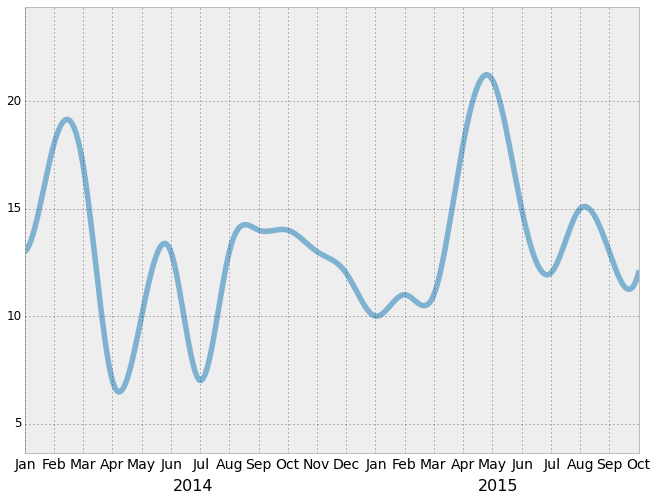

In [189]:
org = RCHIL
fig = plt.figure(figsize=(11,8))


x_smooth = np.linspace(0, len(org.Date.value_counts().resample('M', how='sum'))-1, 300)
#np.arange(0,len(org.Date.value_counts().resample('M', how='sum'))-1)
y_smooth = spline(np.arange(0,len(org.Date.value_counts().resample('M', how='sum'))),org.Date.value_counts().resample('M', how='sum').fillna(0), 
                      x_smooth)
plt.plot(x_smooth, y_smooth ,linewidth=5.5, alpha=0.6)

x = np.arange(0,len(org.Date.value_counts().resample('M', how='sum')))

plt.xticks(x, org.Date.value_counts().resample('M', how='sum').index.strftime("%b"), rotation='0')

plt.ylim([org.Date.value_counts().resample('M', how='sum').min()-org.Date.value_counts().resample('M', how='sum').std(),org.Date.value_counts().resample('M', how='sum').max()+org.Date.value_counts().resample('M', how='sum').std()])

#plt.ylim([0,org.Date.value_counts().resample('M', how='sum').max()+org.Date.value_counts().resample('M', how='sum').std()])

#plt.yscale('log')#, nonposy='clip')
#from matplotlib.ticker import ScalarFormatter
#ax = fig.gca().yaxis
#ax.set_major_formatter(ScalarFormatter()) 


plt.xlim([0,21])
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")    
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
fig.text(0.313,0.06,"2014",fontsize=16)
fig.text(0.699,0.06,"2015",fontsize=16)


In [149]:
CGC[CGC.CGC_Results == "Positive"].describe()


,Order,Date,Ward Name,CGC,CGC_Results
count,210,210,210,210,210
unique,210,140,164,1,1
top,H9100151,2015-07-28 00:00:00,SURVEY,CGC,Positive
freq,1,7,7,210,210
first,NaN,2014-09-02 00:00:00,NaN,NaN,NaN
last,NaN,2015-10-28 00:00:00,NaN,NaN,NaN


In [ ]:
MIC = [RNONE, RBHOM, RDFRG, RNANA, RCOLI, RHART, RCHIL, RGIAR, RHIS2, RIODA, RTRIC, RHIS3]
EIA = [CGC, C2EIC, C2EIG, C2EIH, EIAG, EIAC, v2EIAH, v2EIAC, v2EIAG, _GIAR]

In [ ]:
#List of codes to be merged: RNONE, RBHOM, RDFRG, RNANA, RCOLI, RHART, RCHIL, RGIAR, RHIS2, RIODA, RTRIC, PEIAH, PEIAC, PEIAG,

In [11]:
#pCGC.describe()

In [10]:
#pCGC[(pCGC.Order.isin(PEIAG.Order))].describe()

In [9]:
#pCGC[pCGC.Order.isin(PEIAC.Order)].describe()

In [8]:
#pCGC[~((pCGC.Order.isin(PEIAG.Order)) | (pCGC.Order.isin(PEIAC.Order)))]

In [467]:
rbwn = merged[merged.columns[0:31:2]].drop("Ward Name",axis=1).rename(columns={"Order":"Total",
                                                                        "RNONE_Results":"Negative", "RBHOM_Results":"B. hominis", 
                                                                          "RDFRG_Results":"D. fragilis",
                                                                          "RNANA_Results":"E. nana",
                                                                          "RCOLI_Results":"E. coli",
                                                                          "RHART_Results":"E. hartmanni", 
                                                                          "RCHIL_Results":"C. mesnili", 
                                                                          "RGIAR_Results": "G. lamblia", 
                                                                          "RHIS2_Results":"E. histolytica/dispar", 
                                                                          "EIAH_Results":"E. histolytica/dispar EIA", 
                                                                          "EIAG_Results":"G. lamblia EIA", 
                                                                          "EIAC_Results":"C. hominis EIA", 
                                                                          "RIODA_Results":"I. butschlii", 
                                                                          "RTRIC_Results":"T. hominis"}).groupby(merged['Ward Name']).count()
rbwn["Positivity (%)"] = (((rbwn['Total'] - rbwn["Negative"])/rbwn['Total'])*100)

In [26]:
rbwn = merged[merged.columns[0:31:2]].drop("Ward Name",axis=1).rename(columns={"Order":"Total",
                                                                        "RNONE_Results":"Negative", "RBHOM_Results":"BHOM", 
                                                                          "RDFRG_Results":"DFRG",
                                                                          "RNANA_Results":"NANA",
                                                                          "RCOLI_Results":"COLI",
                                                                          "RHART_Results":"HART", 
                                                                          "RCHIL_Results":"CHIL", 
                                                                          "RGIAR_Results": "GIAR", 
                                                                          "RHIS2_Results":"HIS2", 
                                                                          "EIAH_Results":"EIAH", 
                                                                          "EIAG_Results":"EIAG", 
                                                                          "EIAC_Results":"EIAC", 
                                                                          "RIODA_Results":"IODA", 
                                                                          "RTRIC_Results":"TRIC"}).groupby(merged['Ward Name']).count()
rbwn["Positivity (%)"] = (((rbwn['Total'] - rbwn["Negative"])/rbwn['Total'])*100)

In [27]:
rbwn["Positivity (%)"] = rbwn["Positivity (%)"].apply(lambda x: Decimal(x))
rbwn["Positivity (%)"] = rbwn["Positivity (%)"].apply(lambda x: round(x,1))
rbwn["Positivity (%)"] = rbwn["Positivity (%)"].astype(float)

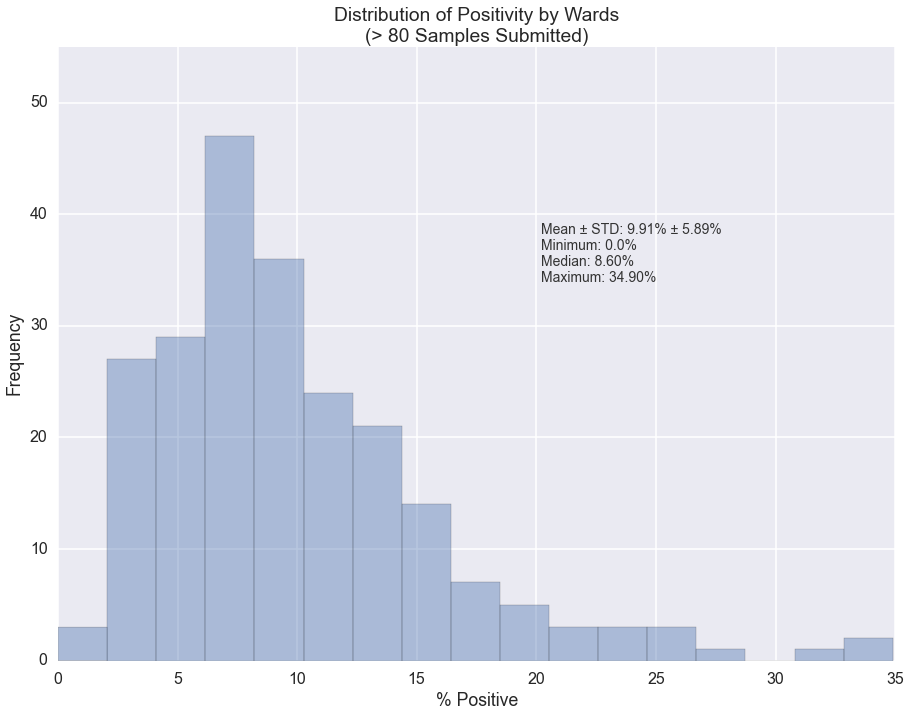

In [92]:
sns.set_context("poster")
np = rbwn[rbwn.Total > 80]
plt.figure(figsize=(15, 11))
plt.title("Distribution of Positivity by Wards\n(> 80 Samples Submitted)")
plt.ylabel("Frequency")
#plt.axvline(x=(np["Positivity (%)"].mean() + np["Positivity (%)"].std()),color='0.6',ls=':')
#plt.axvline(x=(np["Positivity (%)"].mean() - np["Positivity (%)"].std()),color='0.6',ls=':')
#plt.axvline(x=np["Positivity (%)"].mean(),color='r',ls=':')
sns.distplot(rbwn[rbwn.Total > 80]["Positivity (%)"].values, kde=False)
plt.xlabel("% Positive")
plt.ylim([0,55])
plt.text(20.2,33.9,"Mean ± STD: 9.91% ± 5.89%\nMinimum: 0.0%\nMedian: 8.60%\nMaximum: 34.90%", fontsize=14,color="0.2", fontname='Arial')
plt.savefig("Dist_Pos_by_Wards.png")

In [472]:
#rbwn.sort_values(by = "Total", ascending=False)["Positivity (%)"].values#.to_excel("Results_by_Ward_Name_Sorted.xlsx")

In [38]:
#merged.groupby(merged['Ward Name']).count()

In [88]:
rbwn[rbwn.Total > 80]["Positivity (%)"].mode()

0    4.9
1    6.9
2    7.3
3    7.4
4    8.2
5    9.3
dtype: float64

In [89]:
rbwn[rbwn.Total > 80]["Positivity (%)"].describe()

count    226.000000
mean       9.905310
std        5.891943
min        0.000000
25%        6.100000
50%        8.600000
75%       12.700000
max       34.900000
Name: Positivity (%), dtype: float64

In [ ]:
viz = lgn.matrix(perc.T, row_labels=perc.T.index , column_labels=perc.T.index, colormap="Reds", numbers=True, width=1500)

In [681]:
import urllib.request
image_url = 'http://public.lightning-viz.org/visualizations/' + viz.id + '/screenshot/'
urllib.request.urlretrieve(image_url, "wardmatrix.png")

('wardmatrix.png', <http.client.HTTPMessage at 0x109a2bdd8>)

In [695]:
lgn.set_size('full')
vv=rbwn.sort("Total", ascending=False).drop(k, axis=1).head(20)f
lgn.matrix(vv, colormap="Reds", numbers=True, column_labels=vv.columns, row_labels=fl)

In [617]:
print(image_url)

http://public.lightning-viz.org/visualizations/c532e188-2440-4f49-9f4a-08939090c202/screenshot/


In [623]:
vv.index

Index(['Referring Atlanta', 'Genova Europe', 'Lab1 AS', 'MDD Healthcare',
       'Client QA', 'Susan Blum, MD', 'Visions Medical Center',
       'UltraWellness Center', 'IBS Treatment Center',
       'Innovative Medical Solutions, PLLC',
       'Cleveland Clinic Cntr for Functional Med',
       'Steinmetz Cntr for Integrative Med', 'Health and Healing Clinic',
       'NutriPATH', 'Research Account', 'Bio Reference Laboratories Inc',
       'Northampton Wellness Associates',
       'Atlanta Center for Holistic and Integrative', 'Douglas Hall, MD',
       'WholeHealth Chicago'],
      dtype='object', name='Ward Name')

In [15]:
fl = []
for x in vv.index:
    uc = []
    for t, y in enumerate(x):
        if y.isupper():
            uc.append(y)
            try:
                if x[t+1].islower():
                    uc.append(x[t+1])
            except:
                pass
    cb = "".join(uc[:4])
    fl.append(cb)
fl

NameError: name 'vv' is not defined

In [ ]:
for x in vv.index:
    uc = []
    for t, y in enumerate(x):
        if y.isupper():
            uc.append(y)
            uc.append(x[t+1])
    print(uc[:3])  
    

In [26]:
for i,y in enumerate(rbwn.columns[1::2]):
    print(y)

Negative
DFRG
COLI
CHIL
HIS2
TRIC
EIAG
Positivity (%)


In [28]:
for i,y in enumerate(rbwn.columns[2:-1]):
    rbwn["%s (%%)"%y] = (rbwn[y]/rbwn.Total)*100

l = ['Total', 'Negative', 'Positivity (%)']
for i,y in enumerate(rbwn.columns[2:15]):
    l.append(y)
    l.append("%s (%%)"%y)
l
rbwn = rbwn[l]

k = ['Total', 'Negative', 'Positivity (%)']
for i,y in enumerate(rbwn.columns[3::2]):
    k.append(y)
    
k


['Total',
 'Negative',
 'Positivity (%)',
 'BHOM',
 'DFRG',
 'NANA',
 'COLI',
 'HART',
 'CHIL',
 'GIAR',
 'HIS2',
 'IODA',
 'TRIC',
 'EIAH',
 'EIAG',
 'EIAC']

In [16]:
rbwn.sort(['GIAR (%)', 'GIAR'], ascending=False)

,Total,Negative,Positivity (%),BHOM,BHOM (%),DFRG,DFRG (%),NANA,NANA (%),COLI,COLI (%),HART,HART (%),CHIL,CHIL (%),GIAR,GIAR (%),HIS2,HIS2 (%),IODA,IODA (%),TRIC,TRIC (%),EIAH,EIAH (%),EIAG,EIAG (%),EIAC,EIAC (%)
Ward Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Izabela Musial, MD",1,0,100.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000
KIMBLE DC KIM K,1,0,100.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000
Louisa Roscoe,1,0,100.0,1,100.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000
"Todd Overdorf, DC",1,0,100.0,1,100.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,1,100.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000
UPMC Center of Integrative Medicine,1,0,100.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,100.000000,0,0.000000
Bean Sopwith,2,0,100.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,50.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,2,100.000000,0,0.000000
"Peter Droubay, MD",2,1,50.0,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,50.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,50.000000,0,0.000000
Center City Naturopathic,3,2,33.3,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,33.333333,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,33.333333,0,0.000000
Dr Marios Michael Wellness Center,3,2,33.3,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,33.333333,0,0.000000,0,0.000000,0,0.000000,0,0.000000,1,33.333333,0,0.000000


In [66]:
p = []
for i, y in enumerate(t):
    p.append(merged[y].count())

In [49]:
t=[]
for i, y in enumerate(a):
    if i%2 == 0:
        t.append(y)
    

In [38]:
for i, y in enumerate(z):
    print(merged[y].describe())

count     104652
unique         1
top         NONE
freq      104652
Name: RNONE_Results, dtype: object
count     9317
unique       4
top        MOD
freq      3007
Name: RBHOM_Results, dtype: object
count             2722
unique               4
top       FEW TROPH(S)
freq               945
Name: RDFRG_Results, dtype: object
count        1458
unique         13
top       FEW T/C
freq          290
Name: RNANA_Results, dtype: object
count         907
unique         12
top       FEW T/C
freq          222
Name: RCOLI_Results, dtype: object
count         361
unique         11
top       FEW T/C
freq           89
Name: RHART_Results, dtype: object
count         289
unique         12
top       MOD T/C
freq           60
Name: RCHIL_Results, dtype: object
count              195
unique              12
top       RARE CYST(S)
freq                46
Name: RGIAR_Results, dtype: object
count                 181
unique                 17
top       FEW T/C W/O RBC
freq                   54
Name: RHIS2_Resu

In [80]:
p.remove(104652)

[9317, 2722, 1458, 907, 361, 289, 195, 181, 114, 62, 273, 242, 47]

In [81]:
orgs = pd.DataFrame(p)

In [83]:
orgs.sum()

0    16168
dtype: int64

In [49]:
merged[(merged.RBHOM == "RBHOM") & (merged.Date =="06/18/2015")]

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
113806,I6180297,2015-06-18,Advanced Medical Center,NaN,NaN,RBHOM,MOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCHIL,MANY TROPH(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113807,I6180182,2015-06-18,True Med Institute,NaN,NaN,RBHOM,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113808,I6180184,2015-06-18,VitaNovu,NaN,NaN,RBHOM,MANY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113809,I6180217,2015-06-18,IFU-Diagnostic Center,NaN,NaN,RBHOM,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113810,I6180280,2015-06-18,Bios Functional Medicine,NaN,NaN,RBHOM,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113811,I6180315,2015-06-18,The Oasis Center for Health,NaN,NaN,RBHOM,MOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113812,I6180340,2015-06-18,Bernhoft Center for Advanced Medicine,NaN,NaN,RBHOM,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113813,I6180404,2015-06-18,Allergy & Acupuncture Center,NaN,NaN,RBHOM,FEW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113814,I6180422,2015-06-18,"Richard Powers, DC",NaN,NaN,RBHOM,MOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113815,I6180452,2015-06-18,"Frank Aieta, ND",NaN,NaN,RBHOM,MOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
rbwn.sort("Total", ascending=False)[rbwn.drop(k, axis=1) < 50].drop(k, axis=1)

,BHOM (%),DFRG (%),NANA (%),COLI (%),HART (%),CHIL (%),GIAR (%),HIS2 (%),IODA (%),TRIC (%),EIAH (%),EIAG (%),EIAC (%)
Ward Name,,,,,,,,,,,,,
Referring Atlanta,6.351706,1.804967,1.074097,0.718756,0.290733,0.209974,0.092873,0.040380,0.084797,0.028266,0.020190,0.000000,0.000000
Genova Europe,24.095820,11.296383,2.982621,1.972757,0.821982,0.328793,0.446219,0.422734,0.258337,0.000000,0.657586,0.516674,0.093941
Lab1 AS,18.755891,8.953817,2.167766,1.131008,0.471254,0.188501,0.094251,0.377003,0.377003,0.000000,0.565504,0.188501,0.000000
MDD Healthcare,14.511352,9.378085,1.480750,0.691017,0.394867,0.197433,0.098717,0.000000,0.098717,0.000000,0.098717,0.098717,0.000000
Client QA,8.960177,1.769912,1.769912,0.774336,0.553097,0.110619,0.221239,0.110619,0.000000,0.000000,0.221239,0.553097,0.110619
"Susan Blum, MD",9.507830,1.230425,0.894855,0.559284,0.223714,0.447427,0.111857,0.335570,0.111857,0.000000,0.671141,0.111857,0.000000
Visions Medical Center,6.329114,1.611047,1.380898,0.115075,0.345224,0.230150,0.000000,0.000000,0.115075,0.000000,0.000000,0.115075,0.115075
UltraWellness Center,8.842653,1.430429,1.690507,0.650195,0.130039,0.130039,0.260078,0.130039,0.000000,0.000000,0.000000,0.260078,0.260078
IBS Treatment Center,5.007153,1.001431,0.858369,0.429185,0.429185,0.000000,0.286123,0.000000,0.000000,0.000000,0.143062,0.286123,0.000000


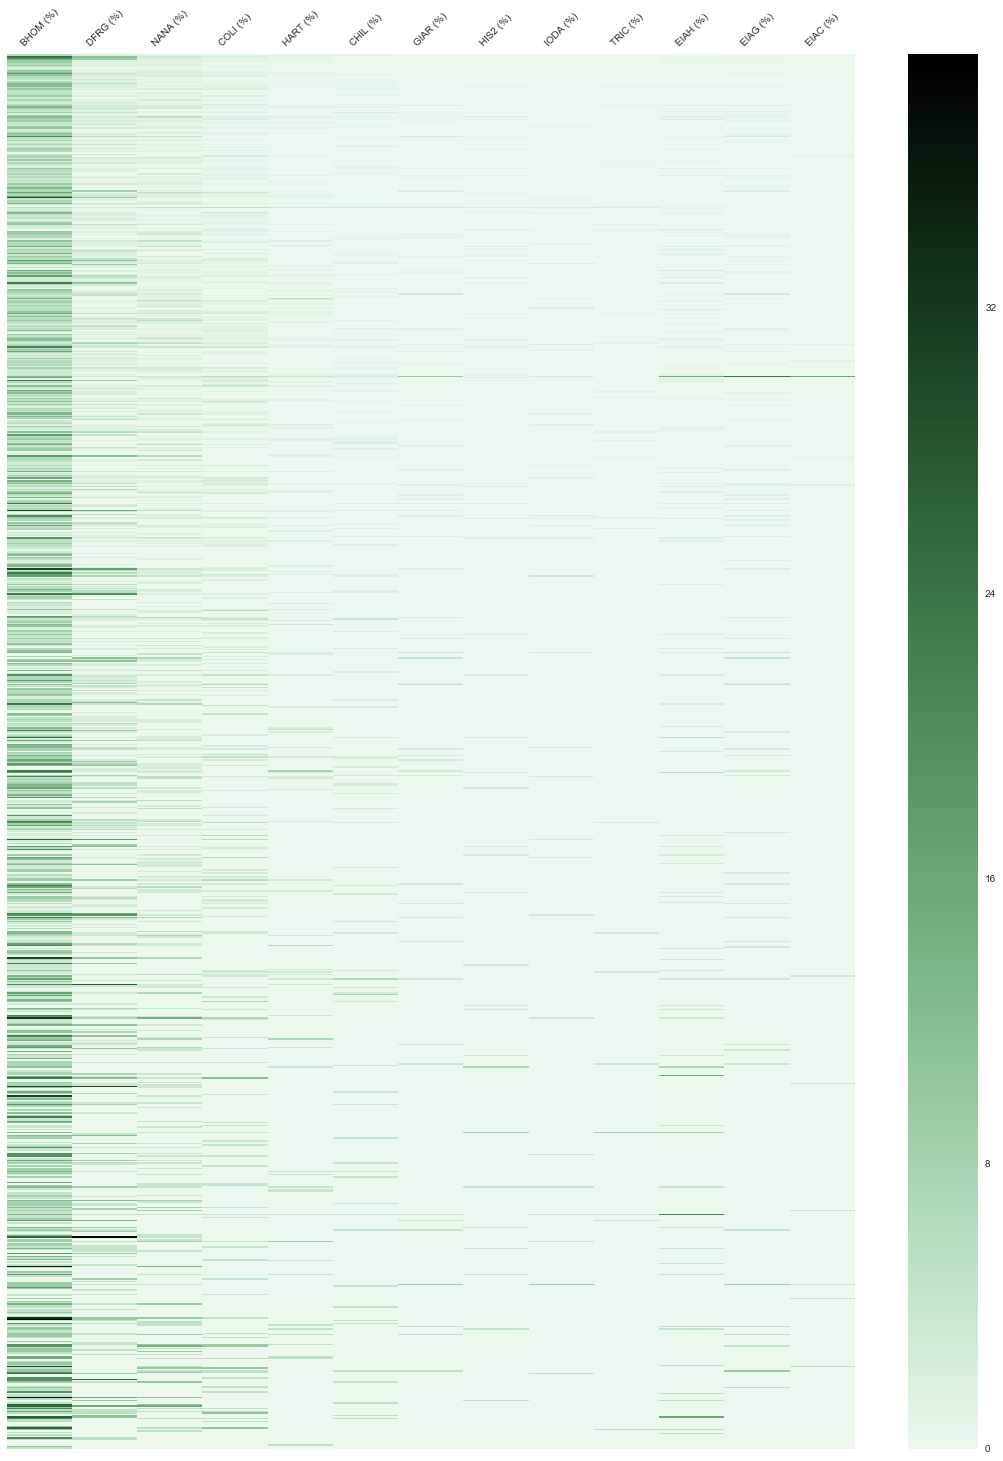

In [38]:
fig, ax = plt.subplots(figsize=(19, 25))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, as_cmap=True)
#cmap = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
#vv=rbwn.sort("Total", ascending=False).drop(k, axis=1).head(100)
vv=rbwn.sort("Total", ascending=False)[rbwn.drop(k, axis=1) < 40].drop(k, axis=1).head(1000)
ax.xaxis.set_label_position('top') 

sns.heatmap(vv, ax=ax, cmap=cmap)
ax.xaxis.tick_top()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
plt.ylabel("")
ax.set_yticklabels("")
plt.savefig('Ward_Mat.png', bbox_inches='tight')


#plt.tight_layout()

In [66]:
merged[merged.Order == "I6300344"]

,Order,Date,Ward Name,RNONE,RNONE_Results,RBHOM,RBHOM_Results,RDFRG,RDFRG_Results,RNANA,RNANA_Results,RCOLI,RCOLI_Results,RHART,RHART_Results,RCHIL,RCHIL_Results,RGIAR,RGIAR_Results,RHIS2,RHIS2_Results,RIODA,RIODA_Results,RTRIC,RTRIC_Results,EIAH,EIAH_Results,EIAG,EIAG_Results,EIAC,EIAC_Results
115406,I6300344,2015-06-30,Integrative Wellness & Research Center,NaN,NaN,NaN,NaN,RDFRG,MOD TROPH(S),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
merged[merged.RNONE == 'RNONE'].Date.value_counts().sort_index().resample('M', how='sum')

2014-01-31    4066
2014-02-28    4846
2014-03-31    4843
2014-04-30    4802
2014-05-31    4745
2014-06-30    3979
2014-07-31    4411
2014-08-31    4206
2014-09-30    4267
2014-10-31    5021
2014-11-30    4362
2014-12-31    4281
2015-01-31    4513
2015-02-28    4539
2015-03-31    5311
2015-04-30    5632
2015-05-31    5414
2015-06-30    5238
2015-07-31    5735
2015-08-31    4856
2015-09-30    5006
2015-10-31    5364
Freq: M, Name: Date, dtype: int64